# Bayesian Data Analysis 
## This course is taught by [**Prof. Dr. Athar Ali Khan, A.M.U. Aligarh**](https://www.amu.ac.in/faculty/statistics-and-operations-research/athar-ali-khan)

**Note :** This course is taught in $\text{ R Programming Language}$

### Books
1. **Bayesian Data Analysis**

**Third Edition**

**Andrew Gelman, John B. Carlin, Hal S. Stern , David B. Dunson, Aki Vehtari, Donald B. Rubin**

2. **Bayesian Models for Astrophysical Data Using R, JAGS, Python, and Stan**

**JOSEPH M. HILBE, RAFAEL S. DE SOUZA, EMILLE E. O. ISHIDA**

# Fundamentals of Bayesian Data Analysis

## The three steps of Bayesian data analysis

The process of Bayesian data analysis can be idealized by dividing it into the following three steps:

1.  *Setting up a full probability model---* A joint probability distribution for all observable and unobservable quantities in a problem. The model should be consistent with knowledge about the underlying scientific problem and the data collection process.

2.  *Conditioning on observed data :* Calculating and interpreting the appropriate posterior distribution---the conditional probability distribution of the unobserved quantities of ultimate interest, given the observed data.

3.  *Evaluating the fit of the model and the implications of the resulting posterior distribution :* how well does the model fit the data, are the substantive conclusions reasonable, and how sensitive are the results to the modeling assumptions in step 1 ? In response, one can alter or expand the model and repeat the three steps.

A primary motivation for Bayesian thinking is that it facilitates a common-sense interpretation of statistical conclusions. For instance, a Bayesian (probability) interval for an unknown quantity of interest can be directly regarded as having a high probability of containing the unknown quantity, in contrast to a frequentist (confidence) interval, which may strictly be interpreted only in relation to a sequence of similar inferences that might be made in repeated practice.

## Bayes' Rule

$$p(\theta , y) =  p(\theta)p(y|\theta)$$

$$p(y,\theta) = p(y)p(\theta|y)$$
$$p(\theta)p(y|\theta)  = p(y)p(\theta|y)$$
$$p(\theta|y) =  \frac{p(\theta)p(y|\theta)}{p(y)}$$
$$p(\theta|y) \propto p(\theta)p(y|\theta)$$
$$Posterior \propto Prior \times Likelihood$$

this is known as *Bayes' rule*. Once we have constructed posterior density every important aspect of Bayesian analysis is done.

**Prediction**

**Prior Prediction :**
$$p(y) = \int p(\theta, y) d\theta = \int p(\theta) p(y|\theta)d\theta$$

This is known as prior predictive distribution as this is prior to data $y$ has been observed.

**Posterior Predictive Distribution :**

After data $y$ has been observed, we can predict an unknown observable, $\tilde{y}$, from the same process. The distribution of $\tilde{y}$ is called posterior predictive distribution, posterior because it is conditional on observed data $y$ and predictive because it is a prediction for an observable $\tilde{y}$.

$$p(\tilde{y}|y) = \int p(\tilde{y},\theta|y)d\theta =
\int p(\tilde{y}|\theta,y) p(\theta |y)d\theta$$
$$p(\tilde{y}|y) = \int  p(\tilde{y}|\theta)p(\theta|y)d\theta$$

The first and the second line display the posterior predictive distribution as an average of conditional prediction over the posterior distribution of $\theta$.

**Simulation**

Step 1. Simulate $\theta$ from posterior density $p(\theta |y)$.

Step 2. Use these simulated values of $\theta$ into the conditional posterior $p(\tilde{y}|\theta)$ and finally simulate $\tilde{y}$ from $p(\tilde{y}|\theta)$, thus without integrating the expression we get simulation from $p(\tilde{y}|y)$.

# Single Parameter Model

If $y_1,y_2,\cdots,y_i \sim iid \,\, B(1,p)$ then $\sum y_i \sim B(n,p)$
$$p(y|\theta)=Bin(y|n,\theta)= {n \choose y} \theta^y (1-\theta)^{n-y}$$

If we assume $p(\theta|y) , \theta \in [0,1]$ then
$$p(\theta|y) \propto p(\theta)p(y|\theta)$$

$$p(\theta|y) \propto \theta^y (1-\theta)^{n-y}$$

$$p(\theta|y) \propto \theta^{y+1-1} (1-\theta)^{n-y+1-1}$$

$$\theta|y \sim Beta(y+1, n-y+1)$$

**Informative Prior for** $\theta$\$

Let $p(y|\theta) \propto \theta^y (1-\theta)^{n-y}$

and prior $$p(y) \propto \theta^{\alpha-1} (1-\theta)^{\beta-1}$$
$$p(\theta|y) \propto p(\theta)p(y|\theta)$$
$$= \theta^{\alpha-1} (1-\theta)^{\beta-1}\theta^y(1-\theta)^{n-y}$$
$$= \theta^{y+\alpha-1} (1-\theta)^{n-y+\beta-1}$$
$$= Beta(\theta|y+\alpha, n-y+\beta)$$
$$\theta|y \sim Beta(y+\alpha, n-y+\beta)$$

-   Since Prior and Posterior belongs to the same family it is terms as conjugacy i.e. conjugate prior for binomial parameter is beta distribution.

-   using properties of beta distribution we can get $E(\theta|y) = \frac{\alpha +y}{\alpha + \beta+n}$ and posterior
    variance $Var(\theta|y) = \frac{(\alpha+y)(\beta+n-y)}{(\alpha+\beta+n)^2(\alpha+\beta+n+1)}$
    or $Var(\theta|y) = \frac{E(\theta|y)[1-E(\theta|y)]}{\alpha+\beta+n+1}$

-   AS $y$ and $n-y$ becomes large with fixed $\alpha$ and $\beta$, then $E(\theta|y) \approx \frac{y}{n}$ and $Var(\theta|y) \approx\frac{1}{n}\frac{y}{n}(1-\frac{y}{n})$.

Thus in the limit, the parameters of the prior distribution have no influence on posterior.

-   In fact, we will see that $p(\theta|y)$ can be $p(\theta|y) \sim N[E(\theta|y), Var(\theta|y)$ as $n \rightarrow \infty$

-   In fact, for binomial parameter parameter $\theta$, normal approximation is more accurate approximation in practice, if we transform $\theta$ to logit scale, i.e. performing inference for $log\big(\frac{\theta}{1-\theta} \big)$ instead of $\theta$ itself. Thus expanding the probability space from $[0,1]$ to $[-\infty, \infty]$, which is more fitting for a normal approximation.

## Numerical Illustration

Suppose out of `n=30`, `y=13` successes we are obtained. Find out bayesian analysis of proportion of successes.

**Solution**

We know that if prior $p(\theta) = 1$ this implies $\alpha=1, \beta=1$ hence posterior $p(\theta|y) \propto Beta(\theta|\alpha+y, \beta+n-y) = Beta(\theta|1+13, 1+30-13) = Beta(\theta|14,18)$

```python
curve(dbeta(x, 14 , 18), from = 0 , to = 1)
```

This will represent exact distribution whose mean and variance can be express as

```python
alpha <- 1
beta <- 1
n <- 30
y <- 13
curve(dbeta(x, alpha+y, beta+n-y), from = 0, to = 1)

# Compute Mean and Variance and sd
mean_theta<- (alpha+y)/(alpha+beta+n)
mean_theta

var_theta<- mean_theta*(1-mean_theta)/(alpha+beta+n+1)
var_theta

sd_theta <- sqrt(var_theta)
sd_theta

curve(dnorm(x, mean = mean_theta, sd=sd_theta), add = TRUE)
legend("topright", c("exact", "approximate"), lty = c(1, 2))
```

Approximate and exact posterior of binomial probability is so close that
it is very difficult to distinguish them.

## How to make use of simulation

```python
theta_sim_30<- rbeta(30, alpha+y, beta+n-y)

theta_sim_100<- rbeta(100, alpha+y, beta+n-y)

theta_sim_1000<- rbeta(1000, alpha+y, beta+n-y)

mean_sim_30<- mean(theta_sim_30)

mean_sim_100<- mean(theta_sim_100)

mean_sim_1000<- mean(theta_sim_1000)

sd_sim_30<- sd(theta_sim_30)

sd_sim_100<- sd(theta_sim_100)

sd_sim_1000<- sd(theta_sim_1000)

mean_sim_30
mean_sim_100
mean_sim_1000

sd_sim_30
sd_sim_100
sd_sim_1000
```

Thus we find that as sample size becomes large the posterior density
approximate well.

## Introduction to Multi-Parameter Models :

Virtually every practical problem in statistics involves more than one unknown one unobservable quantity.
$$p(y|\mu, \sigma^2), \quad \because \theta = (\mu, \sigma^2)$$
 
It is in dealing with such problems that the simple conceptual framework of bayesian approach reveals its principal advantage over other methods of inference. Although a problem can improve several parameters of interest conclusions will often be drawn about one or only a few parameters at a time. In this case, the ultimate aim of a bayesian analysis is to obtain the marginal posterior distribution of the parameters of interest. In principle, the routine to achieving this aim is clear : we first require the joint posterior distribution of all unknowns, and then we integrate this distribution over the unknowns that are not of immediate interest to obtain the desired marginal distribution. Or equivalently, using simulation, we draw samples from the joint posterior distribution and then look at the parameters of interest and ignore the values of the other unknowns. Parameters which are not interest are termed as **nuisance** parameters. 
$$p(\mu|y) = \int p(\mu, \sigma^2|y)d\sigma^2$$ 
$$p(\sigma^2|y) = \int p(\mu, \sigma^2|y)d\mu$$

## Averaging Over Nuisance Parameter

Suppose $\theta = (\theta_1, \theta_2) = (\mu, \sigma^2)$ then if interest centers on $\mu, \sigma^2$ may be treated as nuisance parameter, thus
$$p(\theta_1,\theta_2|y) \propto p(y|\theta_1,\theta_2)\,\, p(\theta_1,\theta_2)$$
Thus, to integrate over $\theta_2$, we do (Marginal of $\theta_1$)
$$p(\theta_1|y) = \int p(\theta_1,\theta_2|y)d\theta_2 $$
$$p(\theta_1|y) = \int p(\theta_1|\theta_2,y)\,p(\theta_2|y) d\theta_2$$

Similarly, for Marginal of $\theta_2$
$$p(\theta_2|y) = \int p(\theta_1,\theta_2|y)d\theta_1$$
$$p(\theta_2|y) = \int p(\theta_2|\theta_1,y)\,p(\theta_1|y) d\theta_1$$

## Normal Data with non-informative prior

$$p(\mu, \sigma^2) \propto p(p|\theta)p(\theta) $$
$p(y|\theta) \sim N(\mu, \sigma^2)$ and
$p(\theta) \rightarrow \text{non informative}$

A non-informative prior is
$$p(\mu, \sigma^2) \propto (\sigma^2)^{-1} \quad \quad \because p(\mu)=1 \,\, and\,\,p(\sigma^2)=\frac{1}{\sigma^2} $$
**The Joint posterior density**
$$p(\mu, \sigma^2) \propto p(y|\mu, \sigma^2)\, p(\mu, \sigma^2)$$
$$p(\mu, \sigma^2) \propto \sigma^{-n-2} exp \big(-\frac{1}{2 \sigma^2} \sum_{i=1}^n (y_i - \mu)^2 \big)$$
$$= \sigma^{-n-2} exp \big(-\frac{1}{2 \sigma^2} \sum_{i=1}^n(y_i - \bar{y} +\bar{y} - \mu)^2 \big)$$
$$= \sigma^{-n-2} exp \Big(-\frac{1}{2 \sigma^2} \big[\sum_{i=1}^n(y_i - \bar{y})^2 + n(\bar{y} - \mu)^2 \big]\Big)$$
$$= \sigma^{-n-2} exp \Big(-\frac{1}{2 \sigma^2} \big[(n-1)s^2 + n(\bar{y} - \mu)^2 \big]\Big)$$
where, $s^2 = \frac{1}{n-1}\sum(y_i - \bar{y})^2$

**The Conditional Distribution**
$$(\mu|\sigma^2, y) \sim N(\bar{y}, \sigma^2/n)$$ Note that,
$$p(\mu,\sigma^2|y) \propto p(\mu|\sigma^2,y)\,\,p(\sigma^2|y)$$ where
$$p(\mu|\sigma^2, y) \sim N(\bar{y}, \sigma^2/n)$$

**The Marginal Posterior of** $\sigma^2$

The Marginal Posterior of $\sigma^2$ is
$$p(\sigma^2|y)\propto \int \sigma^{-n-2} exp \Big(-\frac{1}{2 \sigma^2} \big[(n-1)s^2 + n(\bar{y} - \mu)^2 \big]\Big)d\mu$$
$$p(\sigma^2|y)\propto \int \sigma^{-n-2} exp \big(-\frac{1}{2 \sigma^2} (n-1)s^2\big) \cdot exp \big(-\frac{n}{2 \sigma^2}(\bar{y} - \mu)^2 \big)d\mu$$
$$p(\sigma^2|y)\propto  \sigma^{-n-2} exp \big(-\frac{1}{2 \sigma^2} (n-1)s^2\big) \int exp \big(-\frac{n}{2 \sigma^2}(\bar{y} - \mu)^2 \big)d\mu$$
$$\because f(y|\mu. \sigma^2)= \int \frac{1}{\sigma \sqrt{2\pi}}exp(-\frac{(y - \mu)^2}{2\sigma^2})=1$$
$$= \int exp(-\frac{1}{2\sigma^2}(y - \mu)^2)= \sigma \sqrt{2\pi} = \sqrt{2\pi \sigma^2}$$
$$\therefore p(\sigma^2|y)\propto  \sigma^{-n-2} exp \big(-\frac{1}{2 \sigma^2} (n-1)s^2\big)\cdot \sqrt{2\pi \sigma^2/n}$$
$$\therefore p(\sigma^2|y)\propto (\sigma^2)^{(-n+1)/2} exp \big(-\frac{(n-1)s^2}{2 \sigma^2}\big)$$
which is **scaled inverse** $\chi^2$ **density**.
$$(\sigma^2|y) \sim Inv\,\, \chi^2_{(n-1, s^2)}$$

# Introduction to bayesplot

**bayesplot** is a package meant for plotting of data simulated using
Markov chain Monte Carlo(MCMC).
```
library(bayesplot)
help(pack = bayesplot)
bayesplot::plotting-mcmc-draws
```

```python
library("bayesplot")
library("ggplot2")
library("rstanarm") 

# help(mtcars)
names(mtcars)
head(mtcars)
tail(mtcars)
str(mtcars)

# linear regression model using stan_glm
# using '~ .' to include all variables
fit<- stan_glm(mpg ~ ., data = mtcars, seed = 1111)

print(fit)

summary(fit)
```

To use the posterior draws with the functions in the **bayesplot**
package we'll extract them from the fitted model object :

```python
# Convert the model into array
posterior<-as.array(fit)

# Dimensions of array 
dim(posterior)

# Names of array
dimnames(posterior)
```

We've used `as.array` above (as opposed to `as.matrix`) because it keeps the Markov chains separate (`stan_glm` runs four chains by default). Most of the plots don't actually need the chains to be separate, but for a few of the plots we make in this vignette we'll want to show the chains individually.

## Posterior uncertainty intervals

For models fit using MCMC we can compute posterior uncertainty intervals (sometimes called "credible intervals") in various ways. **bayesplot** currently provides plots of central intervals based on quantiles, although additional options may be provided in future releases (e.g., HDIs, which can be useful in particular cases).

```
help("MCMC-intervals")
```

### `mcmc_intervals, mcmc_areas`

Central posterior uncertainty intervals can be plotted using the `mcmc_intervals` function.

```python
color_scheme_set("red")
mcmc_intervals(posterior, pars = c("cyl", "drat", "am", "sigma"))
```

The default is to show $50\%$ intervals (the thick segments) and $90\%$ intervals (the thinner outer lines). These defaults can be changed using the `prob` and `prob_outer` arguments, respectively. The points in the above plot are posterior medians. The `point_est` argument can be used to select posterior means instead or to omit the point estimates.

To show the uncertainty intervals as shaded areas under the estimated posterior density curves we can use the `mcmc_areas` function.

```python
mcmc_areas(
  posterior, 
  pars = c("cyl", "drat", "am", "sigma"),
  prob = 0.8, # 80% intervals
  prob_outer = 0.99, # 99%
  point_est = "mean"
)
```

## Univariate marginal posterior distributions

**bayesplot** provides functions for looking at histograms or kernel density estimates of marginal posterior distributions, either with all Markov chains combined or with the chains separate.
```
help("MCMC-distributions")
```

### `mcmc_hist`

The `mcmc_hist` function plots marginal posterior distributions (combining all chains) :

```python
color_scheme_set("green")
mcmc_hist(posterior, pars = c("wt", "sigma"))
```

If we want to plot `log(sigma)` rather than sigma we can either transform the draws in advance or use the `transformations` argument.

```{r trans}
color_scheme_set("blue")
mcmc_hist(posterior, pars = c("wt", "sigma"),
          transformations = list("sigma" = "log"))
```

Most of the other functions for plotting MCMC draws also have a `transformations` argument.

### `mcmc_hist_by_chain`

To view separate histograms of each of the four Markov chains we can use `mcmc_hist_by_chain`, which plots each chain in a separate facet in the plot.

```python
color_scheme_set("brightblue")
mcmc_hist_by_chain(posterior, pars = c("wt", "sigma"))
```

### `mcmc_dens`

The `mcmc_dens` function is similar to `mcmc_hist` but plots kernel density estimates instead of histograms.

```python
color_scheme_set("purple")
mcmc_dens(posterior, pars = c("wt", "sigma"))
```

### `mcmc_dens_overlay`

Like `mcmc_hist_by_chain`, the `mcmc_dens_overlay` function separates the Markov chains. But instead of plotting each chain individually, the density estimates are overlaid.

```python
mcmc_dens_overlay(posterior, pars = c("wt", "sigma"))
```

### `mcmc_violin`

The `mcmc_violin` function plots the density estimates of each chain as violins and draws horizontal line segments at user-specified quantiles.

```python
color_scheme_set("blue")
mcmc_violin(posterior, pars = c("wt", "sigma"), probs = c(0.1, 0.5, 0.9))
```

## Bivariate Plots

Various functions are available for plotting bivariate marginal posterior distributions.

### `mcmc_scatter`

    help("MCMC-scatterplots")

The `mcmc_scatter` function creates a simple scatterplot of two parameters.

```python
require(bayesplot)
color_scheme_set("gray")
mcmc_scatter(posterior, pars = c("(Intercept)", "wt"), 
             size = 1.5, alpha = 0.5)
```

### `mcmc_hex`

The `mcmc_hex` function creates a similar plot but using hexagonal binning, which can be useful to avoid overplotting.
```
# requires hexbin package
if (requireNamespace("hexbin", quietly = TRUE)) {
    mcmc_hex(posterior, pars = c("(Intercept)", "wt"))
    }
```

```python
# Same as above
# requires hexbin package
require(hexbin)
mcmc_hex(posterior, pars = c("(Intercept)", "wt"))
```

### `mcmc_pairs`

In addition to `mcmc_scatter` and `mcmc_hex`, bayesplot now provides an `mcmc_pairs` function for creating pairs plots with more than two parameters.

```python
color_scheme_set("pink")
mcmc_pairs(posterior, pars = c("(Intercept)", "wt", "sigma"),
           off_diag_args = list(size = 1.5), diag_fun="dens", off_diag_fun="hex")
```

The univariate marginal posteriors are shown along the diagonal as histograms, but this can be changed to densities by setting `diag_fun="dens"`. Bivariate plots are displayed above and below the diagonal as scatterplots, but it is also possible to use hex plots by setting `off_diag_fun="hex`". By default, `mcmc_pairs` shows some of the Markov chains (half, if an even number of chains) above the diagonal and the others below. There are many more options for controlling how the draws should be split between the plots above and below the diagonal (see the documentation for the `condition` argument), but they are more useful when MCMC diagnostic information is included.

## Trace Plots

Trace plots are time series plots of Markov chains.
```
help("MCMC-traces")
```

### `mcmc_trace`

The `mcmc_trace` function creates standard trace plots:

```python
color_scheme_set("blue")
mcmc_trace(posterior, pars = c("wt", "sigma"))
```

If it's hard to see the difference between the chains we can change to a mixed color scheme, for example:

```python
color_scheme_set("mix-blue-red")
mcmc_trace(posterior, pars = c("wt", "sigma"), 
           facet_args = list(ncol = 1, strip.position = "top"))
```

The code above also illustrates the use of the `facet_args` argument, which is a list of parameters passed to `facet_wrap` in **ggplot2**. Specifying `ncol=1` means the trace plots will be stacked in a single column rather than placed side by side, and `strip.position="left"` moves the facet labels to the y-axis (instead of above each facet).

The `"viridis"` color scheme is also useful for trace plots because it
is comprised of very distinct colors:

```python
color_scheme_set("viridis")
mcmc_trace(posterior, pars = "(Intercept)")
```

### `mcmc_trace_highlight`

The `mcmc_trace_highlight` function uses points instead of lines and reduces the opacity of all but a single chain (which is specified using the highlight argument).

```python
mcmc_trace_highlight(posterior, pars = "sigma", highlight = 3)
```

# Graphical posterior predictive checks using the bayesplot package

```
library(bayesplot)
help(pack = bayesplot)
bayesplot::graphical-ppcs
```

## Graphical posterior predictive checks (PPCs)

The **bayesplot** package provides various plotting functions for graphical posterior predictive checking, that is, creating graphical displays comparing observed data to simulated data from the posterior predictive distribution (Gabry et al, 2019).

The idea behind posterior predictive checking is simple: if a model is a good fit then we should be able to use it to generate data that looks a lot like the data we observed. To generate the data used for posterior predictive checks (PPCs) we simulate from the *posterior predictive distribution*. This is the distribution of the outcome variable implied by a model after using the observed data $y$ (a vector of $N$ outcome values) to update our beliefs about unknown model parameters $\theta$. The posterior predictive distribution for observation $\tilde{y}$ can be written as

$$p(\tilde{y}|y) = \int p(\tilde{y}|\theta)p(\theta|y)d\theta$$
Typically we will also condition on $X$ (a matrix of predictor
variables).

For each draw (simulation) $s=1,\ldots,S$ of the parameters from the posterior distribution, $\theta^{(s)} \sim p(\theta|y)$, we draw an entire vector of $N$ outcomes $\tilde{y}^{(s)}$ from the posterior predictive distribution by simulating from the data model conditional on parameters $\theta^{(s)}$. The result is an $S×N$ matrix of draws $\tilde{y}$.

When simulating from the posterior predictive distribution we can use either the same values of the predictors $X$ that we used when fitting the model or new observations of those predictors. When we use the same values of $X$ we denote the resulting simulations by $y^{rep}$, as they can be thought of as replications of the outcome $y$ rather than predictions for future observations $(\tilde{y} \,\,using\,\, predictors\, \tilde{X})$. This corresponds to the notation from Gelman et al. (2013) and is the notation used throughout the package documentation.

Using the replicated datasets drawn from the posterior predictive distribution, the functions in the **bayesplot** package create various graphical displays comparing the observed data $y$ to the replications. The names of the **bayesplot** plotting functions for posterior predictive checking all have the prefix `ppc_`.

```python
library("bayesplot")
library("ggplot2")
library("rstanarm")
```

**Example models**

To demonstrate some of the various PPCs that can be created with the bayesplot package we'll use an example of comparing Poisson and Negative binomial regression models from one of the **rstanarm** package.

First we fit a Poisson regression model with outcome variable $y$ representing the roach count in each apartment at the end of the experiment.

```python
# see help("rstanarm-datasets")
head(roaches)
```

**roaches**

Data on the efficacy of a pest management system at reducing the number of roaches in urban apartments.

Source: Gelman and Hill (2007)

262 obs. of 6 variables

-   `y` Number of roaches caught

-   `roach1` Pretreatment number of roaches

-   `treatment` Treatment indicator

-   `senior` Indicator for only elderly residents in building

-   `exposure2` Number of days for which the roach traps were used

```python
# pre-treatment number of roaches (in 100s)
roaches$roach100 <- roaches$roach1 / 100 

# using rstanarm's default priors. For details see the section on default
# weakly informative priors at https://mc-stan.org/rstanarm/articles/priors.html
fit_poisson <- stan_glm(
  y ~ roach100 + treatment + senior,
  offset = log(exposure2),
  family = poisson(link = "log"),
  data = roaches,
  seed = 1111, 
  refresh = 0 # suppresses all output as of v2.18.1 of rstan
)

print(fit_poisson)
```

We'll also fit the negative binomial model that we'll compare to the Poisson:

```python
fit_nb <- update(fit_poisson, family = "neg_binomial_2")

print(fit_nb)
```

## Defining y and yrep

In order to use the PPC functions from the **bayesplot** package we need a vector $y$ of outcome values,

```python
y <- roaches$y
```

and a matrix $y^{rep}$ of draws from the posterior predictive distribution,

```python
yrep_poisson <- posterior_predict(fit_poisson, draws = 500)

yrep_nb <- posterior_predict(fit_nb, draws = 500)

dim(yrep_poisson)
dim(yrep_nb)
```

Each row of the matrix is a draw from the posterior predictive
distribution, i.e. a vector with one element for each of the data points
in $y$.

Since we fit the models using **rstanarm** we used its special `posterior_predict` function, but if we were using a model fit with the rstan package we could create yrep in the `generated quantities` block of the Stan program or by doing simulations in R after fitting the model. Draws from the posterior predictive distribution can be used with **bayesplot** regardless of whether or not the model was fit using an interface to Stan. **bayesplot** just requires a `yrep` matrix that has `number_of_draws` rows and `number_of_observations` columns.

## Histograms and density estimates

### `ppc_dens_overlay`

The first PPC we'll look at is a comparison of the distribution of `y` and the distributions of some of the simulated datasets (rows) in the `yrep` matrix.

```python
color_scheme_set("brightblue")
ppc_dens_overlay(y, yrep_poisson[1:50, ])
```

In the plot above, the dark line is the distribution of the observed outcomes `y` and each of the 50 lighter lines is the kernel density estimate of one of the replications of y from the posterior predictive distribution (i.e., one of the rows in `yrep`). This plot makes it easy to see that this model fails to account for the large proportion of zeros in `y`. That is, the model predicts fewer zeros than were actually observed.

To see the discrepancy at the lower values of more clearly we can use the `xlim` function from **ggplot2** to restrict the range of the x-axis:

```python
ppc_dens_overlay(y, yrep_poisson[1:50, ]) + xlim(0, 150)
```

### `ppc_hist`

We could see the same thing from a different perspective by looking at separate histograms of `y` and some of the `yrep` datasets using the `ppc_hist` function :

```python
ppc_hist(y, yrep_poisson[1:5, ])
```

The same plot for the negative binomial model looks much different:

```python
ppc_hist(y, yrep_nb[1:5, ])
```

The negative binomial model does better handling the number of zeros in the data, but it occasionally predicts values that are way too large, which is why the x-axes extend to such high values in the plot and make it difficult to read. To see the predictions for the smaller values more clearly we can zoom in :

```python
ppc_hist(y, yrep_nb[1:5, ], binwidth = 20) + 
  coord_cartesian(xlim = c(-1, 300))
```

## Distributions of test statistics

Another way to see that the Poisson model predicts too few zeros is to look at the distribution of the proportion of zeros over the replicated datasets from the posterior predictive distribution in `yrep` and compare to the proportion of observed zeros in `y`.

### `ppc_stat`

First we define a function that takes a vector as input and returns the proportion of zeros :

```python
prop_zero<- function(x) mean(x == 0)
prop_zero(y) # check proportion of zeros in y
```

The `stat` argument to `ppc_stat` accepts a function or the name of a function for computing a test statistic from a vector of data. In our case we can specify `stat = "prop_zero"` since we've already defined the `prop_zero` function, but we also could have used `stat = function(x) mean(x == 0)`.

```python
ppc_stat(y, yrep_poisson, stat = "prop_zero", binwidth = 0.005)
```

The dark line is at the value $T(y)$, i.e. the value of the test statistic computed from the observed $y$, in this case `prop_zero(y)`. The lighter area on the left is actually a histogram of the proportion of zeros in in the `yrep` simulations, but it can be hard to see because almost none of the simulated datasets in `yrep` have any zeros.

Here's the same plot for the negative binomial model:

```python
ppc_stat(y, yrep_nb, stat = "prop_zero")
```

Again we see that the negative binomial model does a much better job predicting the proportion of observed zeros than the Poisson.

However, if we look instead at the distribution of the maximum value in the replications, we can see that the Poisson model makes more realistic predictions than the negative binomial:

```python
ppc_stat(y, yrep_poisson, stat = "max")

# For NB
ppc_stat(y, yrep_nb, stat = "max")

ppc_stat(y, yrep_nb, stat = "max", binwidth = 100) + 
  coord_cartesian(xlim = c(-1, 5000))
```

## Other PPCs and PPCs by group

There are many additional PPCs available, including plots of predictive intervals, distributions of predictive errors, and more.

The `available_ppc` function can also be used to list the names of all PPC plotting functions :

```python
available_ppc()

available_ppc(pattern = "_grouped")
```

### `ppc_stat_grouped`

For example, `ppc_stat_grouped` is the same as `ppc_stat` except that the test statistic is computed within levels of the grouping variable and a separate plot is made for each level :

```python
ppc_stat_grouped(y, yrep_nb, group = roaches$treatment, stat = "prop_zero")
```

## Providing an interface to bayesplot PPCs from another package

The **bayesplot** package provides the S3 generic function `pp_check`. Authors of R packages for Bayesian inference are encouraged to define methods for the fitted model objects created by their packages. This will hopefully be convenient for both users and developers and contribute to the use of the same naming conventions across many of the R packages for Bayesian data analysis.

To provide an interface to **bayesplot** from your package, you can very easily define a `pp_check` method (or multiple `pp_check` methods) for the fitted model objects created by your package. All a `pp_check` method needs to do is provide the y vector and yrep matrix arguments to the various plotting functions included in **bayesplot**.

Suppose that objects of class `"foo"` are lists with named components, two of which are `y` and `yrep`. Here's a simple method `pp_check.foo` that offers the user the option of two different plots :

```python
# @param object An object of class "foo".
# @param type The type of plot.
# @param ... Optional arguments passed on to the bayesplot plotting function.
pp_check.foo <- function(object, type = c("multiple", "overlaid"), ...) {
  type <- match.arg(type)
  y <- object[["y"]]
  yrep <- object[["yrep"]]
  stopifnot(nrow(yrep) >= 50)
  samp <- sample(nrow(yrep), size = ifelse(type == "overlaid", 50, 5))
  yrep <- yrep[samp, ]
  
  if (type == "overlaid") {
    ppc_dens_overlay(y, yrep, ...) 
  } else {
    ppc_hist(y, yrep, ...)
  }
}
```

To try out `pp_check.foo` we can just make a list with $y$ and $yrep$ components and give it class foo:

```python
x <- list(y = rnorm(200), yrep = matrix(rnorm(1e5), nrow = 500, ncol = 200))
class(x) <- "foo" 

color_scheme_set("purple")
pp_check(x, type = "multiple", binwidth = 0.3)
```

```python
color_scheme_set("darkgray")
pp_check(x, type = "overlaid")
```

### Examples of `pp_check`methods in other packages

Several packages currently use this approach to provide an interface to bayesplot's graphical **posterior** predictive checks. See, for example, the `pp_check` methods in the **rstanarm** and **brms** packages.

# How to use the rstanarm package

```
library(rstanarm)
help(pack = rstanarm)
rstanarm::rstanarm
```

The goal of the **rstanarm** package is to make Bayesian estimation routine for the most common regression models that applied researchers use. This will enable researchers to avoid the counter-intuitiveness of the frequentist approach to probability and statistics with only minimal changes to their existing R scripts.

The four steps of a Bayesian analysis are

1.  Specify a joint distribution for the outcome(s) and all the unknowns, which typically takes the form of a marginal prior distribution for the unknowns multiplied by a likelihood for the outcome(s) conditional on the unknowns. This joint distribution is proportional to a posterior distribution of the unknowns conditional on the observed data

2.  Draw from posterior distribution using Markov Chain Monte Carlo (MCMC).

3.  Evaluate how well the model fits the data and possibly revise the model.

4.  Draw from the posterior predictive distribution of the outcome(s) given interesting values of the predictors in order to visualize how a manipulation of a predictor affects (a function of) the outcome(s).

Step 1 is necessarily model-specific and is covered in more detail in the other vignettes that cover specific forms of the marginal prior distribution and likelihood of the outcome. It is somewhat more involved than the corresponding first step of a frequentist analysis, which only requires that the likelihood of the outcome be specified. However, the default priors in the **rstanarm** package should work well in the majority of cases. Steps 2, 3, and 4 are the focus of this vignette because they are largely not specific to how the joint distribution in Step 1 is specified.

The key concept in Step 3 and Step 4 is the posterior predictive distribution, which is the distribution of the outcome implied by the model after having used the observed data to update our beliefs about the unknown parameters. Frequentists, by definition, have no posterior predictive distribution and frequentist predictions are subtly different from what applied researchers seek. Maximum likelihood estimates do not condition on the observed outcome data and so the uncertainty in the estimates pertains to the variation in the sampling distribution of the estimator, i.e. the distribution of estimates that would occur if we could repeat the process of drawing a random sample from a well-defined population and apply the estimator to each sample. It is possible to construct a distribution of predictions under the frequentist paradigm but it evokes the hypothetical of repeating the process of drawing a random sample, applying the estimator each time, and generating point predictions of the outcome. In contrast, the posterior predictive distribution conditions on the observed outcome data in hand to update beliefs about the unknowns and the variation in the resulting distribution of predictions reflects the remaining uncertainty in our beliefs about the unknowns.

## 6.1 Step 1 : Specify a Posterior Distribution

The posterior distribution with independent priors can be written as

$$f(\alpha,\beta_1,\beta_2|\mathbf{y},\mathbf{X}) \propto f(\alpha) f(\beta_1) f(\beta_2) \times \prod_{i=1}^J g^{-1}(\eta_i)^{y_i}\big(1 - g^{-1}(\eta_i)\big)^{n_i-y_i}$$ 
where $\eta_i = \alpha + \beta_1 education_i + \beta_2 Female_i$ is the linear predictor and a function of an intercept $\alpha$, a coefficient on the years of education $\beta_1$, and an intercept-shift $\beta_2$ for the case where the respondent is female. These data are organized such that $y_i$ is the number of respondents who agree with the statement that have the same level of education and the same gender, and $(n_i-y_i)$ is the number of such people who disagree with the statement. The inverse link function, $p = g^{-1}(\eta_i)$, for a binomial likelihood can be one of several Cumulative Distribution Functions (CDFs) but in this case is the standard logistic CDF, $g^{-1}(\eta_i )=\frac{1}{1 + e^{-\eta_i}}$.

Suppose we believe prior to seeing the data that $\alpha, \beta_1$, and $\beta_2$ are probably close to zero, are as likely to be positive as they are to be negative, but have a small chance of being quite far from zero. These beliefs can be represented by Student t distributions with a few degrees of freedom in order to produce moderately heavy tails. In particular, we will specify seven degrees of freedom. Note that these purported beliefs may well be more skeptical than your actual beliefs, which are probably that women and people with more education have less conservative societal views.

### Note on "prior beliefs" and default priors

In this vignette we use the term "prior beliefs" to refer in generality to the information content of the prior distribution (conditional on the model). Sometimes previous research on the topic of interest motivates beliefs about model parameters, but other times such work may not exist or several studies may make contradictory claims. Regardless, we nearly always have some knowledge that should be reflected in our choice of prior distributions. For example, no one believes a logistic regression coefficient will be greater than five in absolute value if the predictors are scaled reasonably. You may also have seen examples of so-called "non-informative" (or "vague", "diffuse", etc.) priors like a normal distribution with a variance of 1000. When data are reasonably scaled, these priors are almost always a bad idea for various reasons (they give non-trivial weight to extreme values, reduce computational efficiency, etc). The default priors in **rstanarm** are designed to be weakly informative, by which we mean that they avoid placing unwarranted prior weight on nonsensical parameter values and provide some regularization to avoid overfitting, but also do allow for extreme values if warranted by the data. If additional information is available, the weakly informative defaults can be replaced with more informative priors.

## Step 2: Draw from the posterior distribution

The likelihood for the sample is just the product over the $J$ groups of
$$g^{-1}(\eta_i)^{y_i} \big(1-g^{-1}(\eta_i)\big)^{n_i-y_i},$$ which can
be maximized over $\alpha, \beta_1$, and $\beta_2$ to obtain frequentist estimates by calling

Data from a survey from 1974 / 1975 asking both female and male responders about their opinion on the statement: Women should take care of running their homes and leave running the country up to men.

```python
    data("womensrole")

    education : years of education.

    gender : a factor with levels Male and Female.

    agree : number of subjects in agreement with the statement. 
    
    disagree : number of subjects in disagreement with the statement.
```

$$\eta_i = \alpha + \beta_1 Education_i + \beta_2 Female_i$$

```python
# Load the require libraries
library(rstanarm)
library(ggplot2)
library(bayesplot)

# Set the theme
theme_set(bayesplot::theme_default())
```

## Draw from posterior distribution

```python
# Load the data 
data("womensrole", package = "HSAUR3")

# Add a column
womensrole$total<- womensrole$agree + womensrole$disagree

# Head of data
head(womensrole)

# Fit the glm model (frequentist)
womensrole_glm_1<- glm(cbind(agree, disagree) ~ education + gender,
                        data = womensrole, family = binomial(link = "logit"))

round(coef(summary(womensrole_glm_1)), 3)
```

The p-value for the null hypothesis that $\beta_1=0$ is very small, while the p-value for the null hypothesis that $\beta_2=0$ is very large. However, frequentist p-values are awkward because they do not pertain to the probability that a scientific hypothesis is true but rather to the probability of observing a $z$-statistic that is so large (in magnitude) if the null hypothesis were true. The desire to make probabilistic statements about a scientific hypothesis is one reason why many people are drawn to the Bayesian approach.

A model with the same likelihood but Student t priors with seven degrees of freedom can be specified using the **rstanarm** package in a similar way by prepending `stan_` to the `glm` call and specifying priors (and optionally the number of cores on your computer to utilize) :

```python
# Fit the bayesian glm model 
womensrole_bglm_1<- stan_glm(cbind(agree, disagree) ~ education + gender, 
                              data = womensrole, 
                             family = binomial(link = "logit"), 
                             prior = student_t(df = 7, 0, 5), 
                             prior_intercept = student_t(df = 7, 0, 5), 
                             cores = 2, seed = 12345)

womensrole_bglm_1
```

As can be seen, the "Bayesian point estimates" which are represented by the posterior medians --- are very similar to the maximum likelihood estimates. Frequentists would ask whether the point estimate is greater in magnitude than double the estimated standard deviation of the sampling distribution. But here we simply have estimates of the standard deviation of the marginal posterior distributions, which are based on a scaling of the Median Absolute Deviation (MAD) from the posterior medians to obtain a robust estimator of the posterior standard deviation. In addition, we can use the `posterior_interval` function to obtain a Bayesian uncertainty interval for $\beta_1$ :

```python
ci95 <- posterior_interval(womensrole_bglm_1, prob = 0.95, pars = "education")
round(ci95, 2)
```

Unlike frequentist confidence intervals which are not interpretable in terms of post-data probabilities --- the Bayesian uncertainty interval indicates we believe after seeing the data that there is a $0.95$ probability that β2 is between `ci95[1,1]` and `ci95[1,2]`. Alternatively, we could say that there is essentially zero probability that $\beta_2>0$, although frequentists cannot make such a claim coherently.

Many of the post-estimation methods that are available for a model that is estimated by `glm` are also available for a model that is estimated by `stan_glm`. For example,

```python
cbind(Median = coef(womensrole_bglm_1), MAD_SD = se(womensrole_bglm_1))

# not deviance residuals
summary(residuals(womensrole_bglm_1)) 

# Variance-Covariance Matrix
cov2cor(vcov(womensrole_bglm_1))
```

**rstanarm** does provide a confint method, although it is reserved for computing confidence intervals in the case that the user elects to estimate a model by (penalized) maximum likelihood. When using full Bayesian inference (the **rstanarm** default) or approximate Bayesian inference the `posterior_interval` function should be used to obtain Bayesian uncertainty intervals.

## Step 3: Criticize the model

The `launch_shinystan` function in the **shinystan** package provides almost all the tools you need to visualize the posterior distribution and diagnose any problems with the Markov chains. In this case, the results are fine and to verify that, you can call

```python
    launch_shinystan(womensrole_bglm_1, ppd = FALSE)
```

which will open a web browser that drives the visualizations.

For the rest of this subsection, we focus on what users can do programmatically to evaluate whether a model is adequate. A minimal requirement for Bayesian estimates is that the model should fit the data that the estimates conditioned on. The key function here is `posterior_predict`, which can be passed a new `data.frame` to predict out-of-sample, but in this case is omitted to obtain in-sample posterior predictions :

```python
y_rep <- posterior_predict(womensrole_bglm_1)
dim(y_rep)
```

The resulting matrix has rows equal to the number of posterior simulations, which in this case is $2000$ and columns equal to the number of observations in the original dataset, which is $42$ combinations of education and gender. Each element of this matrix is a predicted number of respondents with that value of education and gender who agreed with the survey question and thus should be reasonably close to the observed proportion of agreements in the data. We can create a plot to check this:

```python
par(mfrow = 1:2, mar = c(5,3.7,1,0) + 0.1, las = 3)
boxplot(sweep(y_rep[,womensrole$gender == "Male"], 2, STATS = 
               womensrole$total[womensrole$gender == "Male"], FUN = "/"), 
        axes = FALSE, main = "Male", pch = NA,
        xlab = "Years of Education", ylab = "Proportion of Agrees")
with(womensrole, axis(1, at = education[gender == "Male"] + 1, 
                      labels = 0:20))

axis(2, las = 1)
with(womensrole[womensrole$gender == "Male",], 
     points(education + 1,  agree / (agree + disagree), 
            pch = 16, col = "red"))
boxplot(sweep(y_rep[,womensrole$gender == "Female"], 2, STATS = 
          womensrole$total[womensrole$gender == "Female"], FUN = "/"), 
          axes = FALSE, main = "Female", pch = NA,
        xlab = "Years of Education", ylab = "")
with(womensrole, axis(1, at = education[gender == "Female"] + 1,
     labels = 0:20))
with(womensrole[womensrole$gender == "Female",], 
     points(education + 1,  agree / (agree + disagree), 
            pch = 16, col = "red"))
```

Here the boxplot provide the *median, IQR* and the *hinges* of the posterior predictive for a gender and level of education, while the red points represent the corresponding observed data, As can we seen the model the observed dat fairly well for to years education but predicts less well for very low or very high levels of education, where there are less data.

Consequently we might consider a modal where education has a quadratic effect on agreement, which is easy to specify using R formula syntax.

```python
(womensrole_bglm_2 <- update(womensrole_bglm_1, formula. = . ~ . + I(education^2)))
```

Frequentist would test the Null Hypothesis that the coeff of squared lavel of education is 0. Bayesian might also ask whether such a model is expected to produce better out of sample prediction than a model with only level of education.

The latter question can be answered using leave-one-out cross-validation or the approximation thereof provided by the loo function in the loo package, for which a method is provided by the **rstanarm** package.

```python
require(loo)
loo_bglm_1<- loo(womensrole_bglm_1)
loo_bglm_2<- loo(womensrole_bglm_2)
```

First we verify that posterior is not to sensitive to any particular observation in the dataset.

```python
par(mfrow = 1:2, mar = c(5,3.8,1,0) + 0.1, las = 3)
plot(loo_bglm_1, label_points = TRUE)
plot(loo_bglm_2, label_points = TRUE)
```

There are only one or two moderate outliers (whose statistics are greater than $0.5$), which should not have too much of an effect on the resulting model comparison :

```python
compare_models(loo_bglm_1, loo_bglm_2)

loo_compare(loo_bglm_1, loo_bglm_2)
```

In this case there is little difference in the expected log pointwise deviance between the two models, so we are essentially indifferent between them after taking into a count that second model estimates an additional parameter. The "LOO Information Criterion (LOOIC)"

```python
loo_bglm_1
```

Frequentists use AIC for diagonistic which ignores the prior and assumes that posterior distribution is multivariate normal, whereas the functions from the **loop** package used here do not assume that the posterior distribution is multivariate normal and integrate over uncertainty in the parameters. This only assumes that any one observation can be omitted without having a major effect on the posterior distribution, which can be judged using the plots above.

## Step 4: Analyze manipulations of predictors

Frequentists attempt to interpret the estimates of the model, which is difficult except when the model is linear, has no inverse link function, and contains no interaction terms. Bayesians can avoid this difficulty simply by inspecting the posterior predictive distribution at different levels of the predictors. For example,

```python
# note: in newdata we want agree and disagree to sum to the number of people we
# want to predict for. the values of agree and disagree don't matter so long as
# their sum is the desired number of trials. we need to explicitly imply the
# number of trials like this because our original data are aggregate. if we had
# bernoulli data then it would be a given we wanted to predict for single
# individuals.
newdata <- data.frame(agree = c(0,0), disagree = c(100,100), education = c(12,16),
                      gender = factor("Female", levels = c("Male", "Female")))

y_rep <- posterior_predict(womensrole_bglm_2, newdata)
summary(apply(y_rep, 1, diff))
```

As can be seen, out of $100$ women who have a college degree versus $100$ women with only a high school degree, we would expect about $20$ fewer college-educated women to agree with the question. There is an even chance that the difference is between $24$ and $16$, a one-in-four chance that it is greater, and one-in-four chance that it is less.

## Troubleshooting

This section provides suggestions for how to proceed when you encounter warning messages generated by the modeling functions in the **rstanarm** package. The example models below are used just for the purposes of concisely demonstrating certain difficulties and possible remedies (we won't worry about the merit of the models themselves). The references at the end provide more information on the relevant issues.

### Markov Chains didn't converge

**Recommendation :** Run the chains for more iterations.

By default, all **rstanarm** modeling functions will run four randomly initialized Markov chains, each for 2000 iterations (including a warmup period of 1000 iterations that is discarded). All chains must converge to the target distribution for inferences to be valid. For most models, the default settings are sufficient, but if you see a warning message about Markov chains not converging, the first thing to try is increasing the number of iterations. This can be done by specifying the `iter` argument (e.g. `iter = 3000`).

One way to monitor whether a chain has converged to the equilibrium distribution is to compare its behavior to other randomly initialized chains. This is the motivation for the Gelman and Rubin potential scale reduction statistic Rhat. The Rhat statistic measures the ratio of the average variance of the draws within each chain to the variance of the pooled draws across chains; if all chains are at equilibrium, these will be the same and Rhat will be one. If the chains have not converged to a common distribution, the Rhat statistic will tend to be greater than one.

Gelman and Rubin's recommendation is that the independent Markov chains be initialized with diffuse starting values for the parameters and sampled until all values for $Rhat$ are below $1.1$. When any Rhat values are above 1.1 rstanarm will print a warning message like this:

```python
    Markov chains did not converge! Do not analyze results! 
```

To illustrate how to check the Rhat values after fitting a model using **rstanarm** we'll fit two models and run them for different numbers of iterations.

```python
bad_rhat<- stan_glm(mpg~. , data = mtcars, iter = 20)

good_rhat<- stan_glm(mpg ~. , data = mtcars, iter = 500)
```

Here the first model leads to the warning message about convergence but the second model does not. Indeed, we can see that many Rhat values are much bigger than 1 for the first model :

```python
rhat_b<- summary(bad_rhat)[, "Rhat"]
rhat_b
rhat_b[rhat_b > 1.1]
```

Since we didn't get a warning for the second model we shouldn't find any parameters with an Rhat far from 1:

```python
rhat_g<- summary(good_rhat)[, "Rhat"]
rhat_g

any(summary(good_rhat)[, "Rhat"] > 1.1)
```

### Divergent transitions

**Recommendation :** increase the target acceptance rate `adapt_delta`.

Hamiltonian Monte Carlo (HMC), the MCMC algorithm used by Stan, works by simulating the evolution of a Hamiltonian system. Stan uses a symplectic integrator to approximate the exact solution of the Hamiltonian dynamics. When the step size parameter is too large relative to the curvature of the log posterior this approximation can diverge and threaten the validity of the sampler. **rstanarm** will print a warning if there are any divergent transitions after the warmup period, in which case the posterior sample may be biased. The recommended method is to increase the `adapt_delta` parameter -- target average proposal acceptance probability in the adaptation -- which will in turn reduce the step size. Each of the modeling functions accepts an `adapt_delta` argument, so to increase `adapt_delta` you can simply change the value from the default value to a value closer to 1. To reduce the frequency with which users need to manually set `adapt_delta`, the default value depends on the prior distribution used (see `help("adapt_delta",  package = "rstanarm")` for details).

The downside to increasing the target acceptance rate -- and, as a consequence, decreasing the step size -- is that sampling will tend to be slower. Intuitively, this is because a smaller step size means that more steps are required to explore the posterior distribution. Since the validity of the estimates is not guaranteed if there are any post-warmup divergent transitions, the slower sampling is a minor cost.

### Maximum treedepth exceeded

**Recommendation :** increase the maximum allowed treedepth
`max_treedepth`.

Configuring the No-U-Turn-Sampler (the variant of HMC used by Stan) involves putting a cap on the depth of the trees that it evaluates during each iteration. This is controlled through a maximum depth parameter `max_treedepth`. When the maximum allowed tree depth is reached it indicates that NUTS is terminating prematurely to avoid excessively long execution time. If **rstanarm** prints a warning about transitions exceeding the maximum treedepth you should try increasing the `max_treedepth` parameter using the optional `control` argument. For example, to increase `max_treedepth` to 20 (the default used **rstanarm** is 15) you can provide the argument `control = list(max_treedepth = 20)` to any of the **rstanarm** modeling functions. If you do not see a warning about hitting the maximum treedepth (which is rare), then you do not need to worry.

## Conclusion

In this vignette, we have gone through the four steps of a Bayesian analysis. The first step --- specifying the posterior distribution varies considerably from one analysis to the next because the likelihood function employed differs depending on the nature of the outcome variable and our prior beliefs about the parameters in the model varies not only from situation to situation but from researcher to researcher. However, given a posterior distribution and given that this posterior distribution can be drawn from using the **rstanarm** package, the remaining steps are conceptually similar across analyses. The key is to draw from the posterior predictive distribution of the outcome, which is the what the model predicts the outcome to be after having updated our beliefs about the unknown parameters with the observed data. Posterior predictive distributions can be used for model checking and for making inferences about how manipulations of the predictors would affect the outcome.

Of course, all of this assumes that you have obtained draws from the posterior distribution faithfully. The functions in the **rstanarm** package will throw warnings if there is evidence that the draws are tainted, and we have discussed some steps to remedy these problems. For the most part, the model-fitting functions in the **rstanarm** package are unlikely to produce many such warnings, but they may appear in more complicated models.

If the posterior distribution that you specify in the first step cannot be sampled from using the **rstanarm** package, then it is often possible to create a hand-written program in the the Stan language so that the posterior distribution can be drawn from using the **rstan** package. See the documentation for the **rstan** package or <https://mc-stan.org> for more details about this more advanced usage of Stan. However, many relatively simple models can be fit using the **rstanarm** package without writing any code in the Stan language, which is illustrated for each estimating function in the **rstanarm** package in the other vignettes.

# Estimating Generalized Linear Models for Count Data with rstanarm
```
library(rstanarm)
help(pack = rstanarm)
rstanarm::count
```

```python
library(ggplot2)
library(bayesplot)
theme_set(bayesplot::theme_default())
```

## Introduction

This vignette explains how to estimate generalized linear models (GLMs) for count data using the `stan_glm` function in the **rstanarm** package.

The four steps of a Bayesian analysis are

1.  Specify a joint distribution for the outcome(s) and all the unknowns, which typically takes the form of a marginal prior distribution for the unknowns multiplied by a likelihood for the outcome(s) conditional on the unknowns. This joint distribution is proportional to a posterior distribution of the unknowns conditional on the observed data

2.  Draw from posterior distribution using Markov Chain Monte Carlo (MCMC).

3.  Evaluate how well the model fits the data and possibly revise the model.

4.  Draw from the posterior predictive distribution of the outcome(s) given interesting values of the predictors in order to visualize how a manipulation of a predictor affects (a function of) the outcome(s).

Steps 3 and 4 are covered in more depth by the vignette entitled "How to Use the **rstanarm** Package". This vignette focuses on Step 1 for Poisson and negative binomial regression models using the `stan_glm` function.

## Likelihood

If the outcome for a single observation $y$ is assumed to follow a Poisson distribution, the likelihood for one observation can be written as a conditionally Poisson PMF

$$\frac{1}{y!} \lambda^y e^{-\lambda}$$

where $\lambda = E(y | \mathbf{x}) = g^{-1}(\eta)$ and $\eta = \alpha + \mathbf{x}^\top \boldsymbol{\beta}$ is a linear predictor. For the Poisson distribution it is also true that $\lambda = Var(y | \mathbf{x})$, i.e. the mean and variance are both $\lambda$. Later in this vignette we also show how to estimate a negative binomial regression, which relaxes this assumption of equal conditional mean and variance of $y$.

Because the rate parameter $\lambda$ must be positive, for a Poisson GLM the link function $g$ maps between the positive real numbers $\mathbb{R}^+$ (the support of $\lambda$) and the set of all real numbers $\mathbb{R}$. When applied to a linear predictor $\eta$ with values in $\mathbb{R}$, the inverse link function $g^{-1}(\eta)$ therefore returns a positive real number.

Although other link functions are possible, the canonical link function for a Poisson GLM is the log link $g(x) = \ln{(x)}$. With the log link, the inverse link function is simply the exponential function and the likelihood for a single observation becomes

$$\frac{g^{-1}(\eta)^y}{y!} e^{-g^{-1}(\eta)} = \frac{e^{\eta y}}{y!} e^{-e^\eta}$$

Priors A full Bayesian analysis requires specifying prior distributions $f(\alpha)$ and $f(\boldsymbol{\beta})$ for the intercept and vector of regression coefficients. When using `stan_glm`, these distributions can be set using the `prior_intercept` and `prior` arguments. The `stan_glm` function supports a variety of prior distributions, which are explained in the **rstanarm** documentation `(help(priors, package = 'rstanarm')`.

As an example, suppose we have $K$ predictors and believe prior to seeing the data --- that $\alpha, \beta_1, \dots, \beta_K$ are as likely to be positive as they are to be negative, but are highly unlikely to be far from zero. These beliefs can be represented by normal distributions with mean zero and a small scale (standard deviation). To give $\alpha$ and each of the $\beta$s this prior (with a scale of 1, say), in the call to `stan_glm` we would include the arguments `prior_intercept = normal(0,1)` and `prior = normal(0,1)`.

If, on the other hand, we have less a priori confidence that the parameters will be close to zero then we could use a larger scale for the normal distribution and/or a distribution with heavier tails than the normal like the Student t distribution. **Step 1** in the "How to Use the **rstanarm** Package" vignette discusses one such example.

## Posterior

With independent prior distributions, the joint posterior distribution for $\alpha$ and $\boldsymbol{\beta}$ in the Poisson model is proportional to the product of the priors and the $N$ likelihood contributions:

$$f(\alpha,\boldsymbol{\beta} | \mathbf{y},\mathbf{X}) \propto f(\alpha) \times \prod_{k=1}^K f(\beta_k) \times \prod_{i=1}^N { \frac{g^{-1}(\eta_i)^{y_i}}{y_i!} e^{-g^{-1}(\eta_i)}}$$
This is posterior distribution that `stan_glm` will draw from when using MCMC.

## Poisson and Negative Binomial Regression Example

This example comes from Chapter 8.3 of Gelman and Hill (2007).

We want to make inferences about the efficacy of a certain pest management system at reducing the number of roaches in urban apartments. Here is how Gelman and Hill describe the experiment (pg. 161):

`[…] the treatment and control were applied to 160 and 104 apartments, respectively, and the outcome measurement $y_i$ in each apartment $i$ was the number of roaches caught in a set of traps. Different apartments had traps for different numbers of days […]`

In addition to an intercept, the regression predictors for the model are the pre-treatment number of roaches `roach1`, the treatment indicator `treatment`, and a variable indicating whether the apartment is in a building restricted to elderly residents `senior`. Because the number of days for which the roach traps were used is not the same for all apartments in the sample, we include it as an exposure, which slightly changes the model described in the **Likelihood** section above in that the rate parameter $\lambda_i = exp(\eta_i)$ is multiplied by the exposure $u_i$ giving us $y_i \sim Poisson(u_i \lambda_i)$. This is equivalent to adding $\ln{(u_i)}$ to the linear predictor $\eta_i$ and it can be specified using the `offset` argument to `stan_glm`.

```python
library(rstanarm)
data(roaches)

# Rescale
roaches$roach1 <- roaches$roach1 / 100

# Estimate original model
glm1 <- glm(y ~ roach1 + treatment + senior, offset = log(exposure2), 
            data = roaches, family = poisson)

# Estimate Bayesian version with stan_glm
stan_glm1 <- stan_glm(y ~ roach1 + treatment + senior, offset = log(exposure2),
                      data = roaches, family = poisson, 
                      prior = normal(0, 2.5), 
                      prior_intercept = normal(0, 5),
                      seed = 12345 , refresh = 0)
```

The `formula, data, family`, and `offset` arguments to `stan_glm` can be specified in exactly the same way as for `glm`. The `poisson` family function defaults to using the log link, but to write code readable to someone not familiar with the defaults we should be explicit and use `family = poisson(link = "log")`.

We've also specified some optional arguments. The `chains` argument controls how many Markov chains are executed, the cores argument controls the number of `cores` utilized by the computer when fitting the model. We also provided a seed so that we have the option to deterministically reproduce these results at any time. The `stan_glm` function has many other optional arguments that allow for more user control over the way estimation is performed. The documentation for `stan_glm` has more information about these controls as well as other topics related to GLM estimation.

Here are the point estimates and uncertainties from the `glm` fit and `stan_glm` fit, which we see are nearly identical :

```python
round(rbind(glm = coef(glm1), stan_glm = coef(stan_glm1)), digits = 2)
```

(Note: the dataset we have is slightly different from the one used in Gelman and Hill (2007), which leads to slightly different parameter estimates than those shown in the book even when copying the `glm` call verbatim. Also, we have rescaled the `roach1` predictor. For the purposes of this example, the actual estimates are less important than the process.)

Gelman and Hill next show how to compare the observed data to replicated datasets from the model to check the quality of the fit. Here we don't show the original code used by Gelman and Hill because it's many lines, requiring several loops and some care to get the matrix multiplications right (see pg. 161-162). On the other hand, the **rstanarm** package makes this easy. We can generate replicated datasets with a single line of code using the `posterior_predict` function :

```python
yrep <- posterior_predict(stan_glm1)
dim(yrep)
```

By default `posterior_predict` will generate a dataset for each set of parameter draws from the posterior distribution. That is, `yrep` will be an $S\times N$ matrix, where $S$ is the size of the posterior sample and $N$ is the number of data points. Each row of `yrep` represents a full dataset generated from the posterior predictive distribution. For more about the importance of the `posterior_predict` function, see the "How to Use the **rstanarm** Package" vignette.

Gelman and Hill take the simulated datasets and for each of them compute the proportion of zeros and compare to the observed proportion in the original data. We can do this easily using the `pp_check` function, which generates graphical comparisons of the data y and replicated datasets `yrep`.

```python
prop_zero <- function(y) mean(y == 0)

(prop_zero_test1 <- pp_check(stan_glm1, plotfun = "stat", stat = "prop_zero", binwidth = .005))
```

The value of the test statistic (in this case the proportion of zeros) computed from the sample y is the dark blue vertical line. More than $30\%$ of these observations are zeros, whereas the replicated datasets all contain less than $1\%$ zeros (light blue histogram). This is a sign that we should consider a model that more accurately accounts for the large proportion of zeros in the data. Gelman and Hill show how we can do this using an overdispersed Poisson regression. To illustrate the use of a different `stan_glm` model, here we will instead try $\underline{\text{negative binomial}}$ regression, which is also used for overdispersed or zero-inflated count data. The negative binomial distribution allows the (conditional) mean and variance of y to differ unlike the Poisson distribution. To fit the negative binomial model can either use the `stan_glm.nb` function or, equivalently, change the family we specify in the call to `stan_glm` to `neg_binomial_2` instead of `poisson`. To do the latter we can just use `update` :

```python
stan_glm2 <- update(stan_glm1, family = neg_binomial_2)
```

We now use `pp_check` again, this time to check the proportion of zeros in the replicated datasets under the negative binomial model:

```python
prop_zero_test2 <- pp_check(stan_glm2, plotfun = "stat", stat = "prop_zero", 
                            binwidth = 0.01)
# Show graphs for Poisson and negative binomial side by side
bayesplot_grid(prop_zero_test1 + ggtitle("Poisson"), 
               prop_zero_test2 + ggtitle("Negative Binomial"), 
               grid_args = list(ncol = 2))
```

This is a much better fit, as the proportion of zeros in the data falls nicely near the center of the distribution of the proportion of zeros among the replicated datasets. The observed proportion of zeros is quite plausible under this model.

We could have also made these plots manually without using the `pp_check` function because we have the `yrep` datasets created by `posterior_predict`. The `pp_check` function takes care of this for us, but `yrep` can be used directly to carry out other posterior predictive checks that aren't automated by `pp_check`.

When we comparing the models using the **loo** package we also see a clear preference for the negative binomial model

```python
loo1 <- loo(stan_glm1)
loo2 <- loo(stan_glm2)
loo_compare(loo1, loo2)

loo1
loo2
```

which is not surprising given the better fit we've already observed from the posterior predictive checks.

Lower looic is better fit of the model. Simce looic for poisson is greater than the looic of negative binomial. Hence Negative Binomial is better fit.

$looic = -2 \times elpd\_diff$

# Introduction to Bayesian computation

## Notes

Bayesian computation revolves around two steps : 

1. Computation of the posterior distribution, $p(\theta|y)$

2.  Computation of the posterior predictive distribution,
    $p(\tilde{y}|y)$

## Normalized and Unnormalized Densities

$p(\theta|y)$ is the target distribution and $q(\theta|y)$ is the unnormalized density.

-   $p(y)= \frac{1}{\sqrt{2\pi}}e^{-y^2/2}$, since $\int p(y)dy=1 \Rightarrow p(y)$ is normalize.

-   $q(y)= e^{-y^2/2}$, since $\int p(y)dy \ne 1 \Rightarrow q(y)$ is not normalize.

Our requirement is that $\frac{q(\theta|y)}{p(\theta|y)}$ should be constant.

## Log Densities

To avoid computational overflows or underflows one should compute with $log \,\, p(\theta|y)$

## Numerical Integration

$$E(h(\theta)|y)= \int h(\theta)\, p(\theta|y)d\theta$$ which is often interactable and one has to rely to simulation.

## Simulation Methods

Simulation (stochastic) methods are based on obtaining random samples $\theta^s$ from the desired distribution $p(\theta)$ and estimating the expectation of any function $h(\theta|y)$ as :
$$E(h(\theta)|y)= \int h(\theta)\, p(\theta|y)d\theta = \frac{1}{S}\sum_{s=1}^Sh(\theta^s)$$

## Distribution Approximations

### Normal Approximation to Posterior $p(\theta|y)$

If the posterior distribution $p(\theta|y)$ is unimodal and roughly symmetric, it can be convenient to approximate it by a normal distribution that is the logorithm of the posterior density is approximated by a quadratic function of $\theta$.

A **Taylor Series expansion of** $log\,\,p(\theta|y)$ centered at posterior mode $\hat{\theta}$, gives

$$log\,\, p(\theta|y)= log\,\,p(\hat{\theta}|y)+ \frac{d}{d\theta}p(\theta|y)|_{\theta = \hat{\theta}} (\theta-\hat{\theta}) + \frac{1}{2}(\theta-\hat{\theta})^{\top} \big[\frac{d^2}{d\theta^2}log\,\,p(\theta|y)\big]_{\theta = \hat{\theta}} (\theta-\hat{\theta})$$
$$p(\theta|y)= exp\Bigg[log\,\,p(\hat{\theta}|y)+\frac{1}{2}(\theta-\hat{\theta})^{\top} \big[\frac{d^2}{d\theta^2}log\,\,p(\theta|y)\big]_{\theta = \hat{\theta}} (\theta-\hat{\theta})\Bigg]$$
$$\Rightarrow p(\theta|y) \propto exp\Bigg[-\frac{1}{2}(\theta-\hat{\theta})^{\top} I(\hat{\theta}) (\theta-\hat{\theta})\Bigg]$$

where,

$I(\hat{\theta})=-\big[\frac{d^2}{d\theta^2}log\,\,p(\theta|y)\big]_{\theta = \hat{\theta}}$

$$p(\theta|y) \sim N(\hat{\theta}, I^{-1}(\theta))$$ 
Note that posterior node $\hat{\theta}$ and negative of the *Hesian Matrix* need to the computed in this approximation.

## Simulating from the Predictive Distribution

$$p(\tilde{y}|y) = \int  p(\tilde{y}|\theta)p(\theta|y)d\theta$$ 

Once we have assemble from posterior distribution $p(\theta|y)$, it is typically easy to draw from the predictive distribution of unobserved or future data $\tilde{y}$. For each draw $\theta$ from posterior distribution just draw on $\tilde{y}$ from predictive distribution $p(\tilde{y}|\theta)$.

The set of simulated $\tilde{y}$ from all $\theta's$ characterizes from the posterior distribution.

## Rejection Sampling

Suppose we want to obtain a single random draw from a density $p(\theta|y)$ or perhaps an unnormalized density $q(\theta|y)$ (with $p(\theta|y) = q(\theta|y)/ \int q(\theta|y)d\theta)$.

To perform rejection sampling we require a positive function $g(\theta)$ defined for all $\theta$ for which $p(\theta|y)>0$ that has the following properties :

1.  We can draw from the probability density proportional to $g$. It is not required that $g(\theta)$ integrate to 1, but $g(\theta)$ must have a finite integral.

2.  The importance ratio $\frac{p(\theta|y)}{g(\theta)}$ must have a known bound; that is, there must be some known constant $M$ for which $\frac{p(\theta|y)}{g(\theta)} \le M$ for all $\theta$.

The rejection sampling algorithm proceeds in two steps :

1.  Sample $\theta$ at random from the probability density proportional to $g(\theta)$.

2.  With probability $\frac{p(\theta|y)}{N\,g(\theta)}$ , accept $\theta$ as a draw from $p$. If the drawn $\theta$ is rejected, return to step 1.

## Importance Sampling

Importance sampling is a method, related to rejection sampling and a precursor to the Metropolis algorithm that is used for computing expectations using a random sample drawn from an approximation to the target distribution.

If $g(\theta)$ is a probability density from which we can generate random draws, then we can write,
$$e(h(\theta)|y)=\frac{\int h(\theta)q(\theta|y)d\theta}{\int q(\theta|y)d\theta} = \frac{\int [h(\theta)q(\theta|y)/g(\theta)]g(\theta)d\theta}{\int [q(\theta|y)/g(\theta)]g(\theta)d\theta}$$
which can be estimated using $S$ draws $\theta^1, \theta^2,...,\theta^S$ from $g(\theta)$ by the expression,
$$\frac{\frac{1}{S}\sum_{s=1}^Sh(\theta^s)w(\theta^s)}{\frac{1}{S}\sum_{s=1}^Sw(\theta^s)}$$
where the factors $$w(\theta^s) = \frac{q(\theta^s|y)}{g(\theta^s)}$$ are called importance ratios or importance weights.

If $g(\theta)$ can be chosen such that $\frac{hq}{g}$ is roughly constant, then fairly precise estimates of the integral can be obtained.

## Matropolis Algorithm

1.  Draw a starting point $\theta^0$ from a starting distribution $p_0(\theta)$.

2.  For $t = 1,2,...$

(a) Sample a proposal $\theta^*$ from a jumping or proposal distribution distinct at time $t, J_t(\theta^*|\theta^{t-1}). \,\,J_t$ must be symmatric.

(b) Calculate the ratio of densities
    $$\frac{p(\theta^*|y)}{p(\theta^{t-1}|y)}$$

(c) Set $$
    \theta^t = \begin{cases} 
    \theta^*, & \text{with probability min(r, 1)} \\
    \theta^{t-1}, & \text{otherwhere.} 
    \end{cases}
    $$ are equivalent $u \sim U(0,1)$, if $u<r$ accept
    $\theta^* = \theta^t$ otherwise $\theta^* = \theta^{t-1}$.

**Example :** Bivariate Unit Normal with Normal Jumping :- The Target density $$p(\theta|y) = N(0, I), \quad I_{2 \times 2}$$ The jumping or
proposal $J_t(\theta^*|\theta^{t-1})= N(\theta^*|\theta^{t-1}), 0.2^2I$. Hence 
$$r = \frac{N(\theta^*|0, I)}{N(\theta^{t-1}|0, I)}$$ 
Simulate $u \sim U(0,1)$, if $u<r$ accept $\theta^* = \theta^t$ otherwise $\theta^* = \theta^{t-1}$.

## Matropolis Hestings Algorithm

Note that in Matropolis Algorithm, proposal density is always symmetric, hence a correction for symmatry. i.e $I_E(\theta_a|\theta_b)= J_t(\theta_b|\theta_a)$ is required. Thus
$$r = \frac{p(\theta^*|y)/J_t(\theta^*|\theta^{t-1})}{p(\theta^{t-1}|y)/J_t(\theta^{t-1}|\theta^*)}$$
rest is same as in Matropolis Algorithm.

### Good Properties of Jumping / Proposal Distribution

A good jumping / proposal distribution has the following properties :

-   For any 𝜃, it is easy to sample from 𝐽(𝜃∗\|𝜃).

-   It is easy to compute ratio 𝑟.

-   Each jump goes a reasonable distance in parametric space.

-   The jump are not rejected to frequently otherwise random walk waste time standing still.

## Gibbs Sampler

A particular Markov chain algorithm that has been found useful in many multidimensional problems is the Gibbs sampler, also called alternating conditional sampling, which is defined in terms of subvectors of $\theta$.

Suppose the parameter vector $\theta$ has been divided into $d$ components or subvectors, $\theta = (\theta_1, \theta_2,...,\theta_d)$

-   Each iteration of the Gibbs sampler cycles through the subvectors of $\theta$, drawing each subset conditional on the value of all the others.

-   There are thus $d$ steps in iteration $t$. At each iteration $t$, an ordering of the $d$ subvectors of $\theta$ is chosen and, in turn, each $\theta_j^t$ is sampled from the conditional distribution given all the other components of $\theta$ :
    $$p(\theta_j|\theta_{-j}^{t-1}, y)$$ 

where $\theta_{-j}^{t-1}$ represents all the components of $\theta$, except for $\theta_j$, at their current values :
    $$\theta_{-j}^{t-1} = (\theta_{1}^t,...,\theta_{j-1}^t, \theta_{j+1}^t,...,\theta_{d}^{t-1})$$

-   Thus, each subvector $\theta_j$ is updated conditional on the latest values of the other components of $\theta_j$.

**Example : Bivariate Noraml Distribution** Consider a single observation $(y_1, y_2)$ from a bivariate normally distributed population with unknown mean $\theta = (\theta_1, \theta_2$ and known covariance matrix $\begin{pmatrix} 1 & \rho \\ \rho & 1\end{pmatrix}$. That is

$$p(y|\theta) = {y_1 \choose y_2} \sim N_2 \Bigg({y_1 \choose y_2}, \begin{pmatrix} 1 & \rho \\ \rho & 1\end{pmatrix} \Bigg)$$
With a uniform prior distribution on $\theta$, the posterior distribution $$p(\theta|y) \sim p(y|\theta)\,p(\theta)$$
$$\Rightarrow y|\theta = {y_1 \choose y_2}|y \sim N_2 \Bigg({y_1 \choose y_2}, \begin{pmatrix} 1 & \rho \\ \rho & 1\end{pmatrix} \Bigg)$$
For Gibbs Sampler, we need conditional distributions
$$\theta_1|\theta_2,y \sim N\big(y_1 + \rho(\theta_2-y_2), 1-\rho^2 \big)$$

$$\theta_2|\theta_1,y \sim N\big(y_2 + \rho(\theta_1-y_1), 1-\rho^2 \big)$$

The Gibbs sampler proceeds by alternately sampling from these two normal distribution.

## Assessing Convergence of MCMC Algorithm

Convergence of an MCMC Algorithm is used in the sense of convergence to the target posterior density. Various convergence criteria, quantitative and visual have been proposed to assess convergence. However, the most widely used quantitative convergence criterion is the potential scale reduction factor, $\hat{R}$ and visual criteria are mainly **traceplot** and **auto-correlation plot**.

### Potential Scale Reduction Factor -- $\hat{R}$

For multiple MCMC chains, the criterion is based on comparing the overall variance of the chains to the within chain variance if $V_1$ is between the chain variance and $V_2$ is the within the chain variance and the length of each MCMC chain is 𝑚, then posterior variance is estimated as
$$\widehat{Var(\theta|y)} = \frac{1}{m}V_1 + \frac{m-1}{m}V_2$$ and
$\hat{R}$ is estimated by
$$\hat{R} = \sqrt{\frac{\widehat{Var(\theta|y)}}{V_2}}$$ 
which is reduce to $1$ as $m \rightarrow \infty$

Gelman et al(2014) recommended acceptable limit of potential scale reduction factor $\hat{R} < 1.1$

### Trace Plots

```python
library(bayesplot) 
library(ggplot2) 
library(rstanarm) 
data("mtcars")


# If we decrease the iteration / iter then the mixing is not good. # To check this we can see this at iter = 100

# For iter = 1000
fit<- stan_glm(mpg ~. , data = mtcars, refresh = 0, iter = 1000) 
posterior<- as.array(fit)

dim(posterior)

# Trace Plot
mcmc_trace(posterior, pars = c("wt", "sigma"))
```

**Trace Plot** is simply a two-dimensional plot in which *X-axis* represents the *iteration number* and the *Y-axis* represents the corresponding *simulated values* of the random variable. If the trace plot shows a stationary pattern fluctuating within a band and looks like a *"fact hairy caterpillar"*, then algorithm is said to converge to the posterior distribution and mixing well throughout the support of the posterior density.

When convergence is achieved, different chains overlay within the same plot, as such the chains are indistinguishable. A non-convergence MCMC algorithm will never levels-off to a stable, stationary state or it may show some noticeable periodic pattern.

### Auto-Correlation Plot

```python
# If we decrease the iteration / iter then the result is not good. # To check this we can see this at iter = 100

# For iter = 1000
mcmc_acf(posterior, pars = c("wt", "sigma"))

mcmc_acf_bar(posterior, pars = c("wt", "sigma"))
```

MCMC methods generate dependent sequence of values of the parameters, the dependence is measured by correlation between pairs $\theta^j, \theta^{j+1}$ within a chain, which is known as **auto-correlation** with lag period 1.

In an auto-correlation plot *X-axis* represents *lags* and *auto-correlation* is plotted along the *Y-axis* and the height of each bar express the magnitude of the auto-correlation at that lag. A well mixed chain produces auto-correlation plot where the correlation values quickly drop close to $zero^{(0)}$ as the lag increases. A Markov Chain in which auto-correlation is large at lag 1 and decays slowly as the lag increases is said to mix slowly and it will converge slowly. That is, it will take a long time to find its stationary distribution, even after reaching stationary distribution, it will take many iterations to explore the entire support of the distribution and a very large number of iterations will be required to obtain usefully precise estimation of the characteristics of the posterior distribution.

### Effective Sample Size

```python
# If we decrease the iteration / iter then the n_eff is not good.
# To check this we can see this at iter = 100

# For iter = 1000
summary(fit)
```

The **effective sample size** or effective number of samples `(n_eff)` is a measure of number of independent samples from the posterior distribution. The larger the effective sample size, the greater the precision of the MCMC estimates. MCMC samples are generally auto-correlated and rest independent. Auto-correlation reduces the effective sample size.

Usually $n\_eff > 400$ is sufficient for reliable diagnostics and accurate parameter estimates.

**Stan** provides an estimate of effective sample size for estimates of the parameters.

### Monte Carlo Error

Monte Carlo (MC) error, $mcse$ is a measure of variability of each of the parameter estimates that is due to simulation. It can be said as the measure of performance of Markov Chain.

MCMC samples are not independent rather correlated and as such standard independent sample methods can not be used to compute MCMC error. It is defined as posterior standard deviation (SD) divided by the square root of the effective sample size, that is, MC error
$$mcse = \frac{sd}{\sqrt{n\_eff}}$$ 
It should be less than $0.5$ of the posterior SD, Stan provides MC error.

```python
# Sd_intercept = 19.9	and n_eff_interecept = 1624
mcse_itercept<- 19.9/sqrt(1624) ;	mcse_itercept
```

### Thinning

MCMC generated samples are not independent rather correlated. To reduce auto- correlation, only $k^{th}$ sampled value is saved discarding the rest where $\mu>1$ is the lag period beyond which auto-correlation is low. So thinning reduces auto-correlation and increases effective sample size and whereas effective sample size `(n_eff)`. It also saves storage space and increases computational speed in high dimensional problems.

### Warm-up Period

The starting period, that is the number of iterations before convergence, which are discarded in order to avoid the inflence of the initial values are called **burn-in** or **warm-up period**. The effect of this period becomes less if the sample is large enough. In Stan, this Starting period is known as warm-up period. During this warm-up period. **Stan** does not draw samples from the posterior distribution.

## Hamilton Mante Carlo (HMC)

HMC borrows an idea from physics to suppress the local random walk behavior in the Metropolis algorithm, thus allowing it to move much more rapidly through the target distribution.

Target Density is $p(\theta|y)$.

### Auxiliary Momentum Variable $phi$

HMC introduces auxiliary momentum variables $\phi$ and draw from a joint density $$p(\phi, \theta) = p(\phi|\theta)\,\,p(\theta)$$ In most application $$\phi \sim Multi\_normal(0, \mu)$$ By default Stan sets $M^{−1}$ equal to a diagonal estimate of the covariance computed during warm-up.

### The Hamilton

The joint density $p(\phi, \theta)$ defines a Hamilton
$$H(\phi, \theta) = -log \,\, p(\phi, \theta)$$
$$H(\phi, \theta) = -log \,\, p(\phi, \theta) - log \,\, p(\theta)$$
$$H(\phi, \theta) = \text{Kinetic Energy + Potential Energy}$$

## The Three Steps of an HMC Iteration

1.  The iteration begins by updating $\phi$ with a random draw from it posterior distribution.

2.  The main part of the Hamiltonian Monte Carlo iteration is a simultaneous update of $(\phi, \theta)$. This update involves **L'leapfrog steps'**, which is defined as follows :

Repeat the following steps L times :

(a) Use the gradient of the log-posterior density of $\theta$ to make a half-step of $\phi$ :
$$\phi \leftarrow \phi + \frac{1}{2}\epsilon \frac{d}{d\theta}log\,\, p(\theta|y)$$

(b) Use the 'momentum' vector $\phi$ to update the 'position' vector $\theta$ : $$\phi \leftarrow \phi + \epsilon M^{-1}\phi$$

(c) Again use the gradient of $theta$ to half-update $\phi$ :
$$\phi \leftarrow \phi + \frac{1}{2}\epsilon \frac{d}{d\theta}log\,\, p(\theta|y)$$


3.  Label $\theta^{t-1},\phi^{t-1}$ as the value of the parameter and momentum vectors at the start of the leapfrog process and $\theta^{*},\phi^{*}$ as the value after the L steps. In the accept-reject step, we compute
$$r = \frac{p(\theta^*|y)p(\phi^*)}{p(\theta^{t-1}|y)p(\phi^{t-1}}$$

4.  Set $$
    \theta^t = \begin{cases} 
    \theta^*, & \text{with probability min(r, 1)} \\
    \theta^{t-1}, & \text{otherwhere.} 
    \end{cases}
    $$

This is the step 4, generate $u \sim U(0,1)$, if $u<r$ accept $\theta^* = \theta^t$ otherwise $\theta^* = \theta^{t-1}$.

# Evaluating Mode Fitting

For fitting a Bayesian Model to the data $y$, the posterior distribution $p(\theta|y)$ is obtained. Evaluating model fit means :

(i) Assessing a Single Model

(ii) Comparing two or more completing models.

Posterior predictive distribution is used to check model fit in Bayesian scenario. That is, if a model fits the current data well, future data simulated from the model should look like similar to the current data.

The posterior predictive density
$$p(y_{n+1}|y) = \hat{p}(y_{new}|y) = p(y_{rep}|y)$$ is obtained by the
equation
$$p(y_{n+1}|y) = \int p(y_{n+1}|\theta)\,\, p(\theta|y)d\theta$$

Then drawing samples from $p(y_{n+1}|y)$ can be performed in two steps :

(i) Simulate $\theta_i$ from the posterior distribution $p(\theta|y)$

(ii) For a fixed $\theta_i$, simulate from the data density $p(y_{n+1}|\theta_i)$

A model is said to fit well if the model predicts the future observations or predict the past observations that are consistent with current data.

## Leave-One-Out Information : (LOOIC)

In Bayesian cross-validation, the data are repeatedly partioned into a training set $y_{train}$ and a testing set $y_{test}$. The idea of cross-validation is to fit the model using $y_{train}$ and make predictions based on $y_{test}$.

For a sample of size $n$, if $y_{train}$ contains $n-1$ observations and $y_{test}$ contains only the remaining $1$ data point, then, it is called **Leave-One-Out Cross- Validation (LOOCV)**, it is based on *log pointwise predictive density (lppd)* and defined as follows :
$$lppd_{loocv} = \sum_{i=1}^nlog \big(\int p(y_i|\theta)\,\,p(\theta|y_{-i}\big)d\theta = \sum_{i=1}^nlog\big(E (p(y_i|\theta))\,\,p(\theta|y_{-i})\big)d\theta$$
where $y_{-i}$ is the data set without the $i^{th}$ data point. An can be computed as
$$llpd_{loocv} = \sum_{i=1}log \big(\frac{1}{T}\sum_{i=1}p(y_i|\theta^{it}) \big)$$
where $\theta^{it} = 1,2,...,T$ are draws from the posterior distribution $p(\theta|y_{-i})$.

### The LOOIC

The leave-one-out (cross-validation) information criterian (LOOIC) is defined as 
$$LOOIC = -2 \times llpd_{loocv}$$
$$= -2 \sum_{i=1}^n log\big(\int p(y_i|\theta)\,p(\theta|y_{-i})d\theta\big)$$
The LOOIC is heavily completing intensive because 𝑛 models have to fitted and for each model, the posterior distributions of the parameters are required to be simulated.

However, Vehtrieted(2012) estimated (LOOIC) as
$$LOOIC =  -2\sum_{i=1}^n log \Bigg(\frac{\sum_{s=1}^S w_i^s p(y_i|\theta^s)}{\sum_{s=1}^S w_i^s } \Bigg)$$

where $s = 1,2,...,S$, simulated sample size, $\theta^s$ is the $s^{th}$ value of $\theta$ in the joint posterior sample and $w_i^s$ is a Parets smoothed importance sampling weight. The R package **loo** can be called to compute LOOIC.

Least LOOIC is the best fitted model

## Widely Applicable Information Criterion (WAIC)

Watanabe and Opper(2010) proposed a measure, Widely Applicable Information Criterion (WAIC), which is used for comparing models under Bayesian framework. It is also known as Watanable Akaike information criterion. WAIC is based on log pointwise predictive density (lppd) and define as :
$$WAIC = -2\times lppd + 2 \sum_{i=1}^n Var\,log\, p(y_i|\theta)$$
where,
$lppd = \sum_{i=1}^n log\big(\int p(y_i|\theta)\,p(\theta|y_{-i})d\theta\big)$ and $Var\,log\, p(y_i|\theta)$ is known as *penalty* term which is the seem of posterior variance in log probabilities for each observation $y_i$.

Least WAIC is the least fitted model.

# Using the loo package (version \>= 2.0.0)
```
library(loo)
help(pack = loo)
loo::loo2-example
```
## Introduction

This vignette demonstrates how to use the **loo** package to carry out Pareto smoothed importance-sampling leave-one-out cross-validation (PSIS-LOO) for purposes of model checking and model comparison.

In this vignette we can't provide all necessary background information on PSIS-LOO and its diagnostics (Pareto $k$ and effective sample size)

## Example : Poisson vs negative binomial for the roaches dataset

**Background and model fitting**

The Poisson and negative binomial regression models used below in our example, as well as the `stan_glm` function used to fit the models, are covered in more depth in the **rstanarm** vignette $\underline{\text{Estimating Generalized Linear Models for Count Data with rstanarm}}$. In the rest of this vignette we will assume the reader is already familiar with these kinds of models.

**Roaches data**
`the treatment and control were applied to 160 and 104 apartments, respectively, and the outcome measurement $y_i$ in each apartment $i$ was the number of roaches caught in a set of traps. Different apartments had traps for different numbers of days`

In addition to an intercept, the regression predictors for the model are `roach1`, the pre-treatment number of roaches (rescaled above to be in units of hundreds), the `treatment` indicator treatment, and a variable indicating whether the apartment is in a building restricted to elderly residents `senior`. Because the number of days for which the roach traps were used is not the same for all apartments in the sample, we use the `offset` argument to specify that `log(exposure2)` should be added to the linear predictor.

```python
library("rstanarm")
library("bayesplot")
library("loo")

# the 'roaches' data frame is included with the rstanarm package
data(roaches)

# rescale to units of hundreds of roaches
roaches$roach1 <- roaches$roach1 / 100
head(roaches)
```

### Fit Poisson model

We'll fit a simple Poisson regression model using the `stan_glm`
function from the **rstanarm** package.

```python
fit1 <-
  stan_glm(
    formula = y ~ roach1 + treatment + senior,
    offset = log(exposure2),
    data = roaches,
    family = poisson(link = "log"),
    prior = normal(0, 2.5, autoscale = TRUE),
    prior_intercept = normal(0, 5, autoscale = TRUE),
    seed = 12345, refresh = 0
  )
```

Usually we would also run posterior predictive checks as shown in the **rstanarm** vignette *(Estimating Generalized Linear Models for Count Data with rstanarm)*, but here we focus only on methods provided by the **loo** package.

### Using the loo package for model checking and comparison

*Although cross-validation is mostly used for model comparison, it is also useful for model checking.*

### Computing PSIS-LOO and checking diagnostics

We start by computing PSIS-LOO with the `loo` function. Since we fit our model using rstanarm we can use the `loo` method for `stanreg` objects (fitted model objects from **rstanarm**), which doesn't require us to first extract the pointwise log-likelihood values. If we had written our own Stan program instead of using **rstanarm** we would pass an array or matrix of log-likelihood values to the `loo` function (see, e.g. `help("loo.array", package = "loo")`). We'll also use the argument `save_psis = TRUE` to save some intermediate results to be re-used later.

```python
loo1 <- loo(fit1, save_psis = TRUE)
```

`loo` gives us warnings about the Pareto diagnostics, which indicate that for some observations the leave-one-out posteriors are different enough from the full posterior that importance-sampling is not able to correct the difference. We can see more details by printing the `loo` object.

```python
print(loo1)
```

The table shows us a summary of Pareto $k$ diagnostic, which is used to assess the reliability of the estimates. In addition to the proportion of leave-one-out folds with $k$ values in different intervals, the minimum of the effective sample sizes in that category is shown to give idea why higher $k$ values are bad. Since we have some $k>1$, we are not able to compute an estimate for the Monte Carlo standard error (SE) of the expected log predictive density (`elpd_loo`) and `NA` is displayed.

(Full details on the interpretation of the Pareto $k$ diagnostics are available in the Vehtari, Gelman, and Gabry (2017) and Vehtari, Simpson, Gelman, Yao, and Gabry (2019) papers referenced at the top of this vignette.)

In this case the elpd_loo estimate should not be considered reliable. If we had a well-specified model we would expect the estimated effective number of parameters (p_loo) to be smaller than or similar to the total number of parameters in the model. Here p_loo is almost 300, which is about 70 times the total number of parameters in the model, indicating severe model misspecification.

### Plotting Pareto $k$ diagnostics

Using the `plot` method on our `loo1` object produces a plot of the $k$ values (in the same order as the observations in the dataset used to fit the model) with horizontal lines corresponding to the same categories as in the printed output above.

```python
plot(loo1)
```

This plot is useful to quickly see the distribution of $k$ values, but it's often also possible to see structure with respect to data ordering. In our case this is mild, but there seems to be a block of data that is somewhat easier to predict (indices around 90--150). Unfortunately even for these data points we see some high $k$ values.

### Marginal posterior predictive checks

The loo package can be used in combination with the **bayesplot** package for leave-one-out cross-validation marginal posterior predictive checks Gabry et al (2018). LOO-PIT values are cumulative probabilities for $y_i$ computed using the LOO marginal predictive distributions $p(y_i|y_{−i})$. For a good model, the distribution of LOO-PIT values should be uniform. In the following plot the distribution (smoothed density estimate) of the LOO-PIT values for our model (thick curve) is compared to many independently generated samples (each the same size as our dataset) from the standard uniform distribution (thin curves).

```python
yrep <- posterior_predict(fit1)

ppc_loo_pit_overlay(
  y = roaches$y,
  yrep = yrep,
  lw = weights(loo1$psis_object)
)
```

The excessive number of values close to 0 indicates that the model is under-dispersed compared to the data, and we should consider a model that allows for greater dispersion.

### Try alternative model with more flexibility

Here we will try *negative binomial* regression, which is commonly used for overdispersed count data.

Unlike the Poisson distribution, the negative binomial distribution allows the conditional mean and variance of $y$ to differ.

```python
fit2 <- update(fit1, family = neg_binomial_2)

loo2 <- loo(fit2, save_psis = TRUE, cores = 2)

print(loo2)

plot(loo2, label_points = TRUE)
```

Using the label_points argument will label any $k$ values larger than $0.7$ with the index of the corresponding data point. These high values are often the result of model misspecification and frequently correspond to data points that would be considered "outliers'' in the data and surprising according to the model *Gabry et al (2019)*. Unfortunately, while large $k$ values are a useful indicator of model misspecification, small k values are not a guarantee that a model is well-specified.

If there are a small number of problematic $k$ values then we can use a feature in **rstanarm** that lets us refit the model once for each of these problematic observations. Each time the model is refit, one of the observations with a high $k$ value is omitted and the LOO calculations are performed exactly for that observation. The results are then recombined with the approximate LOO calculations already carried out for the observations without problematic $k$ values :

```python
if (any(pareto_k_values(loo2) > 0.7)) {
  loo2 <- loo(fit2, save_psis = TRUE, k_threshold = 0.7)
}

print(loo2)
```

In the print output we can see that the Monte Carlo SE is small compared to the other uncertainties.

On the other hand, `p_loo` is about $7$ and still a bit higher than the total number of parameters in the model. This indicates that there is almost certainly still some degree of model misspecification, but this is much better than the `p_loo` estimate for the Poisson model.

For further model checking we again examine the LOO-PIT values.

```python
yrep <- posterior_predict(fit2)

ppc_loo_pit_overlay(roaches$y, yrep, lw = weights(loo2$psis_object))
```

The plot for the negative binomial model looks better than the Poisson plot, but we still see that this model is not capturing all of the essential features in the data.

### Comparing the models on expected log predictive density

We can use the `loo_compare` function to compare our two models on expected log predictive density (ELPD) for new data:

```python
loo_compare(loo1, loo2)
```

The difference in ELPD is much larger than several times the estimated standard error of the difference again indicating that the negative-binomial model is expected to have better predictive performance than the Poisson model. However, according to the LOO-PIT checks there is still some misspecification, and a reasonable guess is that a hurdle or zero-inflated model would be an improvement (we leave that for another case study).

# Estimating ANOVA Models with rstanarm
```
library(rstanarm)
help(pack = rstanarm)
rstanarm::aov
```

## Introduction

This vignette explains how to estimate ANalysis Of VAriance (ANOVA) models using the `stan_aov` function in the **rstanarm** package

The four steps of a Bayesian analysis are

1.  Specify a joint distribution for the outcome(s) and all the unknowns, which typically takes the form of a marginal prior distribution for the unknowns multiplied by a likelihood for the outcome(s) conditional on the unknowns. This joint distribution is proportional to a posterior distribution of the unknowns conditional on the observed data

2.  Draw from posterior distribution using Markov Chain Monte Carlo (MCMC).

3.  Evaluate how well the model fits the data and possibly revise the model.

4.  Draw from the posterior predictive distribution of the outcome(s) given interesting values of the predictors in order to visualize how a manipulation of a predictor affects (a function of) the outcome(s).

Steps 3 and 4 are covered in more depth by the vignette entitled "How to Use the **rstanarm** Package". This vignette focuses on Step 1 when the likelihood is the product of independent normal distributions. We also demonstrate that Step 2 is not entirely automatic because it is sometimes necessary to specify some additional tuning parameters in order to obtain optimally efficient results.

## Likelihood

The likelihood for one observation under a linear model can be written as a conditionally normal PDF
$$\frac{1}{\sigma_{\epsilon}\sqrt{2 \pi}}e^{-\frac{1}{2}\big(  \frac{y-\mu}{\sigma_{\epsilon}}\big)^2},$$

where $\mu = \alpha + x^\top \beta$ is a linear predictor and $\sigma_{\epsilon}$ is the standard deviation of the error in predicting the outcome, $y$. The likelihood of the entire sample is the product of $N$ individual likelihood contributions.

An ANOVA model can be considered a special case of the above linear regression model where each of the $K$ predictors in $\mathbf{x}$ is a dummy variable indicating membership in a group. An equivalent linear predictor can be written as $\mu_j = \alpha + \alpha_j$, which expresses the conditional expectation of the outcome in the $j^{th}$ group as the sum of a common mean, α, and a group-specific deviation from the common mean, $\alpha_j$.

## Priors

If we view the ANOVA model as a special case of a linear regression model with only dummy variables as predictors, then the model could be estimated using the prior specification in the `stan_lm` function. In fact, this is exactly how the `stan_aov` function is coded. These functions require the user to specify a value for the prior location (by default the mode) of the $R^2$, the proportion of variance in the outcome attributable to the predictors under a linear model. This prior specification is appealing in an ANOVA context because of the fundamental identity $$SS_{total} = SS_{model} + SS_{error}$$,

where $SS$ stands for sum-of-squares. If we normalize this identity, we obtain the tautology $1 = R^2+(1−R^2)$ but it is reasonable to expect a researcher to have a plausible guess for $R^2$ before conducting an ANOVA. See the vignette for the `stan_lm` function (regularized linear models) for more information on this approach.

If we view the ANOVA model as a difference of means, then the model could be estimated using the prior specification in the `stan_lmer` function. In the syntax popularized by the **lme4** package, `y ~ 1 + (1|group)` represents a likelihood where $\mu_j = \alpha + \alpha_j$ and $\alpha_j$ is normally distributed across the $J$ groups with mean zero and some unknown standard deviation. The `stan_lmer` function specifies that this standard deviation has a Gamma prior with, by default, both its shape and scale parameters equal to $1$, which is just an standard exponential distribution. However, the shape and scale parameters can be specified as other positive values. This approach also requires specifying a prior distribution on the standard deviation of the errors that is independent of the prior distribution for each $\alpha_j$. See the vignette for the `stan_glmer` function (**lme4**-style models using **rstanarm**) for more information on this approach.

## Example

We will utilize an example from the **HSAUR3** package. *A Handbook of Statistical Analyses Using R* (3rd Edition). This book is frequentist in nature and we will show how to obtain the corresponding Bayesian results.

The model in section 4.3.1 analyzes an experiment where rats were subjected to different diets in order to see how much weight they gained. The experimental factors were whether their diet had low or high protein and whether the protein was derived from beef or cereal. Before seeing the data, one might expect that a moderate proportion of the variance in weight gain might be attributed to protein (source) in the diet. The frequentist ANOVA estimates can be obtained:

```python
library(ggplot2)
library(bayesplot)
theme_set(bayesplot::theme_default())

# Load the Data
data("weightgain", package = "HSAUR3")

coef(aov(weightgain ~ source * type, data = weightgain))
```

To obtain Bayesian estimates we can prepend `stan_` to `aov` and specify the prior location of the $R^2$ as well as optionally the number of cores that the computer is allowed to utilize :

```python
library(rstanarm)
post1 <- stan_aov(weightgain ~ source * type, 
                  data = weightgain, 
                  prior = R2(location = 0.5), 
                  adapt_delta = 0.999,
                  seed = 12345, refresh = 0)
post1
```

Here we have specified `adapt_delta = 0.999` to decrease the stepsize and largely prevent divergent transitions. See the Troubleshooting section in the main rstanarm vignette for more details about `adapt_delta`. Also, our prior guess that $R^2 = 0.5$ was overly optimistic. However, the frequentist estimates presumably overfit the data even more.

Alternatively, we could prepend `stan_` to `lmer` and specify the corresponding priors

```python
post2 <- stan_lmer(weightgain ~ 1 + (1|source) + (1|type) + (1|source:type),
                   data = weightgain, prior_intercept = cauchy(),
                   prior_covariance = decov(shape = 2, scale = 2),
                   adapt_delta = 0.999, seed = 12345, refresh = 0)

post2
```

Comparing these two models using the `loo` function in the **loo** package reveals a negligible preference for the first approach that is almost entirely due to its having a smaller number of effective parameters as a result of the more regularizing priors. However, the difference is so small that it may seem advantageous to present the second results which are more in line with a mainstream Bayesian approach to an ANOVA model.

```python
library(loo)
loo(post1)
loo(post2)
# loo(post1, post2)
```

## Conclusion

This vignette has compared and contrasted two approaches to estimating an ANOVA model with Bayesian techniques using the **rstanarm** package. They both have the same likelihood, so the (small in this case) differences in the results are attributable to differences in the priors.

The `stan_aov` approach just calls `stan_lm` and thus only requires a prior location on the $R^2$ of the linear model. This seems rather easy to do in the context of an ANOVA decomposition of the total sum-of-squares in the outcome into model sum-of-squares and residual sum-of-squares.

The `stan_lmer` approach just calls `stan_glm` but specifies a normal prior with mean zero for the deviations from $\alpha$ across groups. This is more in line with what most Bayesians would do naturally particularly if the factors were considered "random" but also requires a prior for $\alpha, \sigma$, and the standard deviation of the normal prior on the group-level intercepts. The `stan_lmer` approach is very flexible and might be more appropriate for more complicated experimental designs.

# JAGS : Just Another Gibs Sampler

**BUGS : Bayesian Analysis Using Gibs Sampling**

Hilbe et.al(2017) *Bayesian Models for astrophysical data using R, JAGS, Python and Stan*, Cambridge University Press.

## Bayesian Synthetic Normal Model in R using JAGS

### Normal linear model in R using JAGS

```python
require(R2jags)
set.seed(1056) # set seed to replicate example

nobs = 5000 # number of observations in model
x1 <- runif(nobs) # random uniform variable

beta0 = 2.0 # intercept
beta1 = 3.0 # slope or coefficient

xb <- beta0 + beta1 * x1 # linear predictor, xb
y <- rnorm(nobs, xb, sd=1) # create y as adjusted random normal variate

# Construct data dictionary
X <- model.matrix(~ 1 + x1)
K <- ncol(X)

model.data <- list(Y = y, # response variable
X = X, # predictors
K = K, # number of predictors including the intercept
N = nobs # sample size
)

# Model set up with JAGS
NORM <- "model{
# Diffuse normal priors for predictors
for (i in 1:K) { beta[i] ~ dnorm(0, 0.0001) }
# Uniform prior for standard deviation
tau <- pow(sigma, -2) # precision
sigma ~ dunif(0, 100) # standard deviation
# Likelihood function
for (i in 1:N){
Y[i]~dnorm(mu[i],tau)
mu[i] <- eta[i]
eta[i] <- inprod(beta[], X[i,])
}
}"

# Initial values
inits <- function () {
list(beta = rnorm(K, 0, 0.01))
}

# Parameters to be displayed
params <- c("beta", "sigma")

# MCMC
normfit <- jags(data = model.data,
inits = inits,
parameters = params,
model = textConnection(NORM),
n.chains = 3,
n.iter = 15000,
n.thin = 1,
n.burnin = 10000)

print(normfit, intervals = c(0.025, 0.975), digits = 2)
```

```python
# Names of Model
names(normfit)

# Names of BUGSoutput
out1<- normfit$BUGSoutput
names(out1)

# beta's
beta<- out1$sims.list$beta
sigma<- out1$sims.list$sigma
head(beta)

# Plot for beta_0
plot(density(beta[,1]))

# Plot for beta_1
plot(density(beta[,2]))

# Plot for sigma
plot(density(sigma))
```

## Bayesian fitting of binomial model using JAGS

**Simulation of data**

```python
set.seed(33559)

nobs<- 2000

m<- 1 + rpois(nobs, 5)

x1<- runif(nobs)

x2<- runif(nobs)

xb<- -2 - 1.5 * x1 + 3 * x2

exb<- exp(xb)

p<- exb/(1 + exb) # prob of p=0

y<- rbinom(nobs, prob=p, size=m)

bindata<- data.frame(y=y, m=m, x1, x2)
```

### ML estimation of binomial model

To get ML estimator we shall make use of `glm()` function of R

```python
noty<- m - y

mybin<- glm(cbind(y, noty) ~ x1 + x2, family=binomial, data=bindata)

summary(mybin)
```

It may be observed that the estimates are very close to the constants
provided.

### Bayesian Analysis with JAGS

```python
library(R2jags)

X<- model.matrix(~ x1 + x2, data = bindata)

K<- ncol(X)

model.data <- list(Y = bindata$y,
                   N = nrow(bindata),
                   X = X,
                   K = K,
                   m = bindata$m)

cat("
model{
# Priors
# Diffuse normal priors betas
for (i in 1:K) { beta[i] ~ dnorm(0, 0.0001)}
# Likelihood
for (i in 1:N){
Y[i] ~ dbin(p[i],m[i])
logit(p[i]) <- eta[i]
eta[i] <- inprod(beta[], X[i,])
}
}
",file='binom.txt')

inits<- function () {
list(
  beta = rnorm(K, 0, 0.1)
) }

params<- c("beta")

BINL<- jags(data = model.data,
            inits = inits,
            parameters = params,
            model.file = "binom.txt",
            n.thin = 1,
            n.chains = 3,
            n.burnin = 3000,
            n.iter = 5000)

print(BINL, intervals=c(0.025, 0.975), digits=3)
```

# Hierarchical Models

Bayesian models we have discussed so for have been based on likelihood and the mixture of prior and likelihood. One of the key assumption of a likelihood that each component of observation in the distribution is independent to other observation.

When there is correlation are time-series auto-correlation in the data caused by clustered, nested of pannel structured data, statistician must make adjustment to the model in order to avoid bias in the interpretation of the parameter.

**Example :** Suppose that a study is made of student scores on the graduate record examination (GRE) subject area test in Physics. The score are taking from applicants for *Ph.D* program in *Astronomy* and *Astrophysics*. We wish to model the test score on the bases of applicant cummulative *GPA* on under-graduates courses taken is *Mathematics* and *Physics*. The model can thus appears as

$$score = \beta_0 + \beta_1 \times GPA + \epsilon$$

where $\beta_0$ and $\beta_1$ are parameters and $\epsilon$ is the error term.

What may concern us, though, is that the *GPA* results could differ depending on where the applicant did their under- graduate work.

Students taking courses at one university may differ from students from at another university. Moreover the type of courses and expectation what must be learn to achieve a given grade may differ from university in other words *GPA* results within a university may be more correlated than the result between the university.

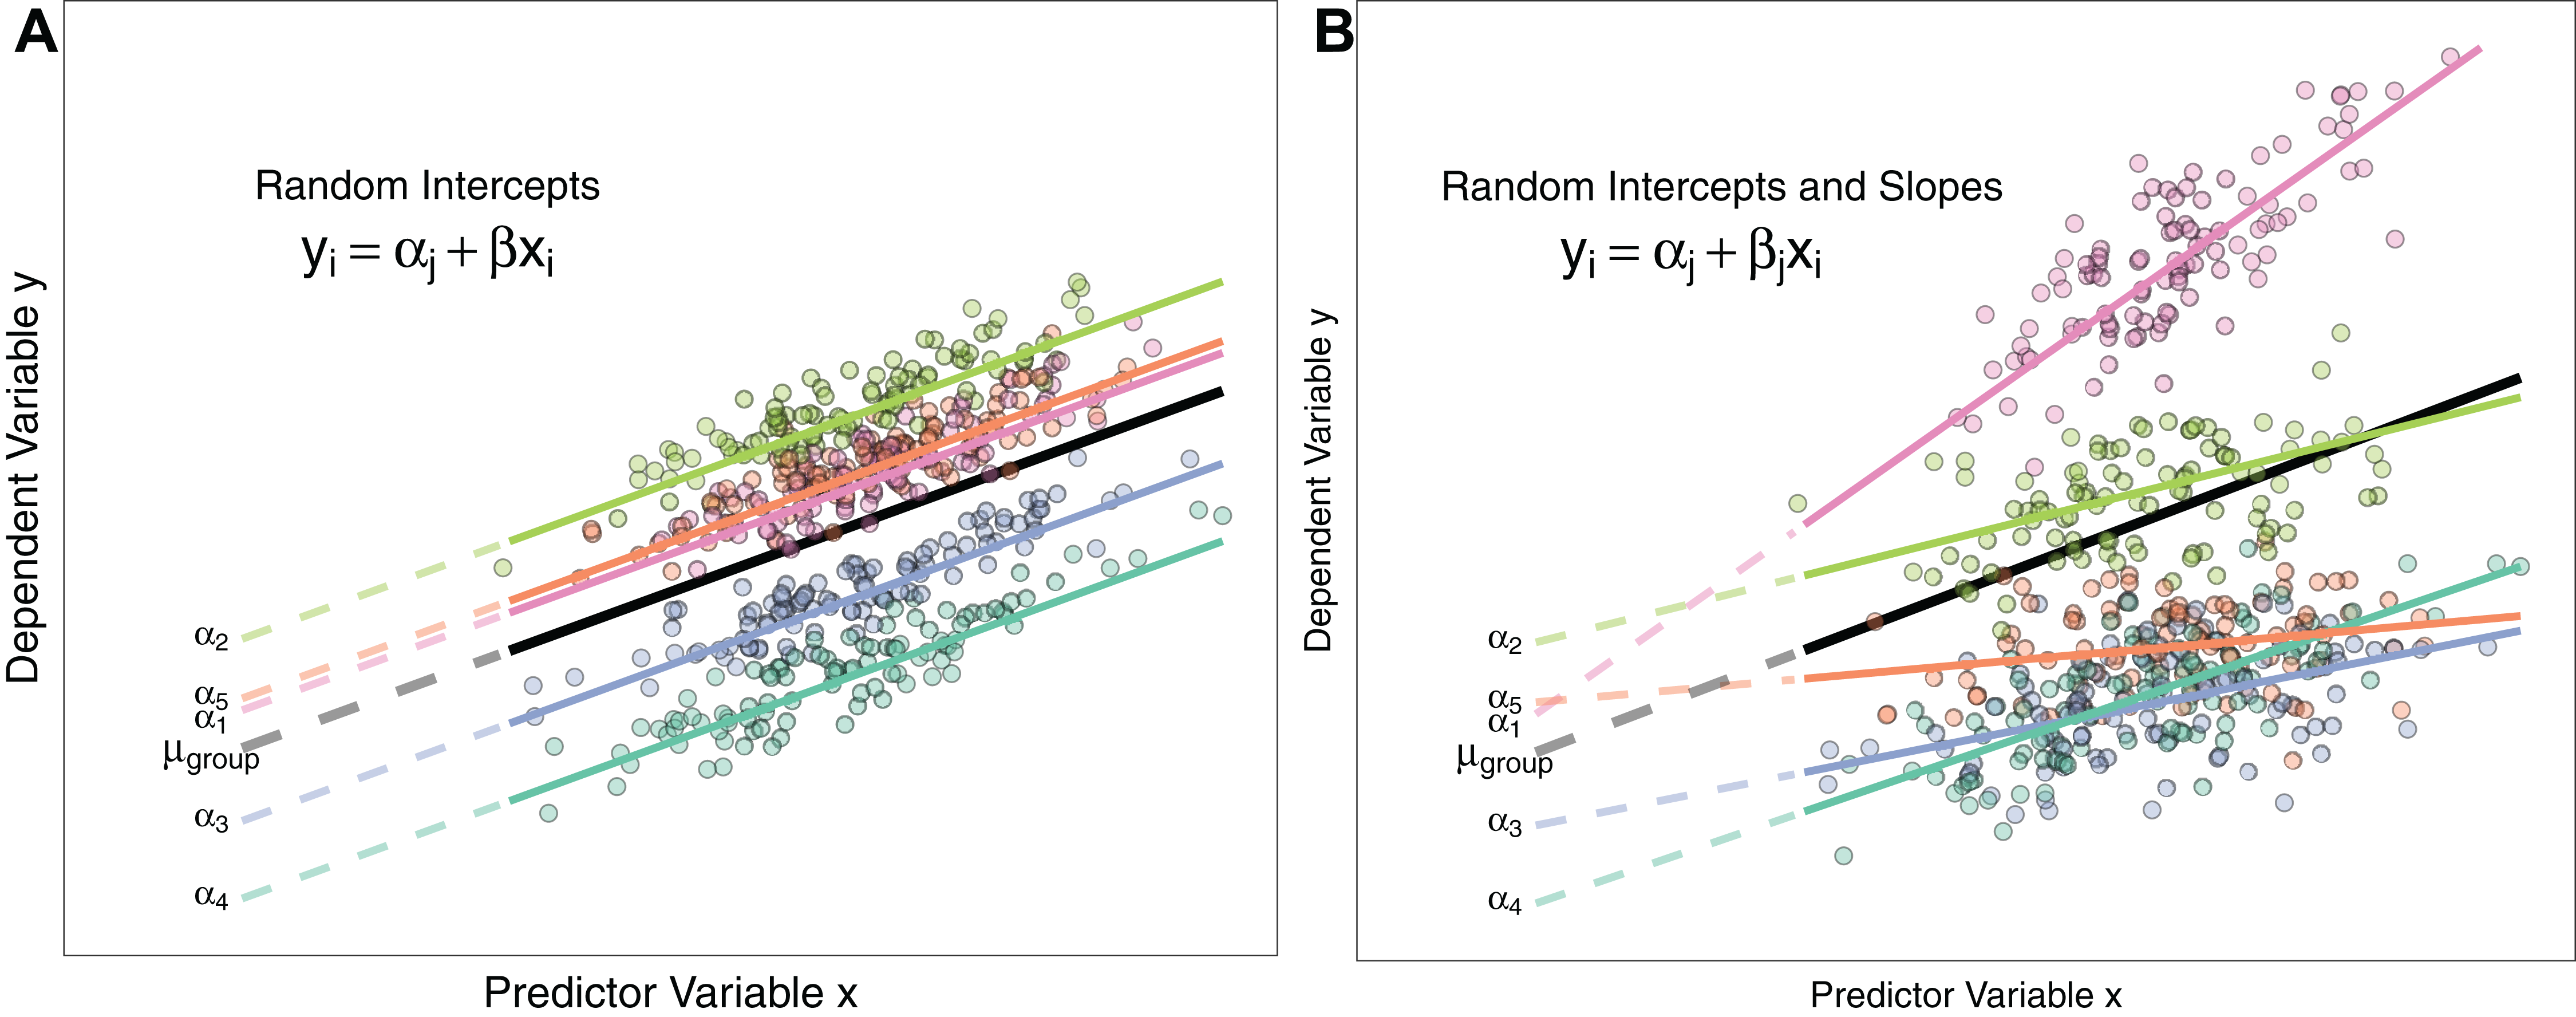

In [1]:
from IPython.display import Image
Image(filename='fig-1.png')

Note that **slope** are *common* but **intercept** are *random*.

The random intercept model conceptually divides the data into separate
model for each university that is part of study. The coefficients are
assumed to remain same but the intercept varies between universities. If
the mean *GPA* result within each university are nearly the same, as the
overall mean *GPA* results then the universities will differ in their
results. If they differ considerably however we know that there is
university effect.

The general formula for random intercept model for a single predictor
can be given as
$$y_{ij} = \beta_0 + \beta_1 \times x_{ij} + \xi_j + \epsilon$$

where $\xi_j$ is the *university effect* or *location effect*.

```python
set.seed(1656)
N <- 4500
NGroups <- 20
x1 <- runif(N)
x2 <- runif(N)
Groups <- rep(1:20, each = 225) # 20 groups, each with 225 observations
a <- rnorm(NGroups, mean = 0, sd = 0.5)
mu <- 1 + 0.2 * x1 - 0.75 * x2 + a[Groups]
y <- rnorm(N, mean=mu, sd=2)
normr <- data.frame(
y = y,
x1 = x1,
x2 = x2,
Groups = Groups,
RE = a[Groups]
)

head(normr)

library(rstanarm)
m1<- stan_lmer(y~x1+x2+(1|Groups), data = normr, refresh = 0)

print(m1)
```

```python
# Accuracy
0.8^2/(0.8^2+2^2)
```

```python
names(m1)

m1$stan_summary
```

```{r, warning=FALSE, message=FALSE}
library(R2jags)

# Data
X<- model.matrix(~ x1 + x2, data = normr)

K<- ncol(X)

re<- as.numeric(normr$Groups)

Nre<- length(unique(normr$Groups))

model.data<- list(
  Y = normr$y, # response
  X = X, # covariates
  N = nrow(normr), # rows in model
  re = re, # random effect
  b0 = rep(0,K), # parameter priors with initial 0 value
  B0 = diag(0.0001, K), # priors for V-C matrix
  a0 = rep(0,Nre), # priors for scale parameters
  A0 = diag(Nre)) # hyperpriors for scale parameters

# Fit
cat("
model {
# Diffuse normal priors for regression parameters
beta ~ dmnorm(b0[], B0[,])
# Priors for random intercept groups
a ~ dmnorm(a0, tau.plot * A0[,])
# Priors for the two sigmas and taus
tau.plot <- 1 / (sigma.plot * sigma.plot)
tau.eps <- 1 / (sigma.eps * sigma.eps)
sigma.plot ~ dunif(0.001, 10)
sigma.eps ~ dunif(0.001, 10)
# Likelihood
for (i in 1:N) {
Y[i] ~ dnorm(mu[i], tau.eps)
mu[i] <- eta[i]
eta[i] <- inprod(beta[], X[i,]) + a[re[i]]
}
}
",file = "lmm.txt")

inits<- function () {
  list(beta = rnorm(K, 0, 0.01),
       a = rnorm(Nre, 0, 1),
       sigma.eps = runif(1, 0.001, 10),
       sigma.plot = runif(1, 0.001, 10)
)}

params<- c("beta","a", "sigma.plot", "sigma.eps")

NORM0<- jags(data = model.data,
             inits = inits,
             parameters = params,
             model.file = "lmm.txt",
             n.thin = 10,
             n.chains = 3,
             n.burnin = 6000,
             n.iter = 10000)

# Output
print(NORM0, intervals=c(0.025, 0.975), digits=3)
```